# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('G:\shipra\Fliprobo internship/Telecom_customer_churn.csv')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Exploratory Data Analysis(EDA)

In [3]:
print('Shape is',df.shape)
print('Total Rows are',df.shape[0])
print('Total Columns are',df.shape[1])

Shape is (7043, 21)
Total Rows are 7043
Total Columns are 21


In [4]:
# checking the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# checking the shape of datatset
df.shape

(7043, 21)

In [6]:
# checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Getting the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Checking for numerical and categorical features.

nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

print('Numerical features in the dataset are:\n',nf,'\n','-'*70,'\n Categorical features in the dataset are:\n',cf)

Numerical features in the dataset are:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object') 
 ---------------------------------------------------------------------- 
 Categorical features in the dataset are:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#Identifying the row's containing white spaces
df.loc[df['TotalCharges']==" "]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

It is showing that there are 11 rows present for the 'TotalCharges' column that doesn't contain any values,hence will replace it my nan value

In [13]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

Now,again checking if white spaces are present in that columns or not

In [14]:
df.loc[df['TotalCharges']==" "]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

All the white spaces are removed now

# Converting  the columns type from string to float

In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
df.TotalCharges.dtypes

dtype('float64')

Now our 'TotalCharges' column is changed into float data type


Now will check null values and data-type of our data frame again

In [17]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Data Visualization

# 1.Countplot

The Value Counts for the attribute "gender" is
 Male      3555
Female    3488
Name: gender, dtype: int64

The Countplot Diagram for the attribute "gender" is
 AxesSubplot(0.125,0.125;0.775x0.755)


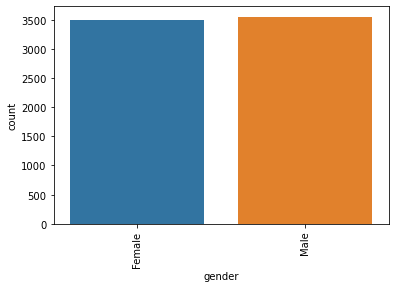



The Value Counts for the attribute "SeniorCitizen" is
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The Countplot Diagram for the attribute "SeniorCitizen" is
 AxesSubplot(0.125,0.125;0.775x0.755)


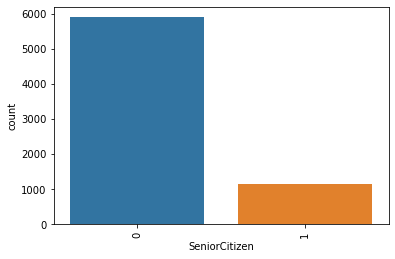



The Value Counts for the attribute "Partner" is
 No     3641
Yes    3402
Name: Partner, dtype: int64

The Countplot Diagram for the attribute "Partner" is
 AxesSubplot(0.125,0.125;0.775x0.755)


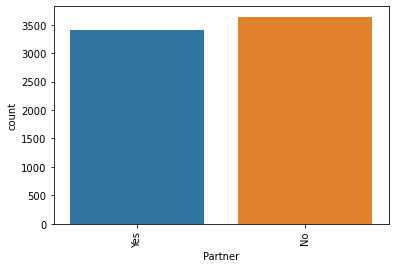



The Value Counts for the attribute "Dependents" is
 No     4933
Yes    2110
Name: Dependents, dtype: int64

The Countplot Diagram for the attribute "Dependents" is
 AxesSubplot(0.125,0.125;0.775x0.755)


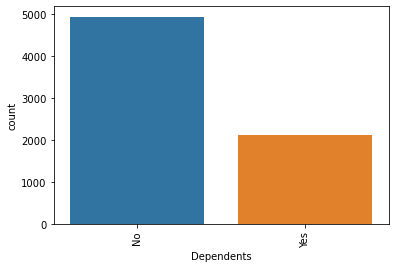



The Value Counts for the attribute "PhoneService" is
 Yes    6361
No      682
Name: PhoneService, dtype: int64

The Countplot Diagram for the attribute "PhoneService" is
 AxesSubplot(0.125,0.125;0.775x0.755)


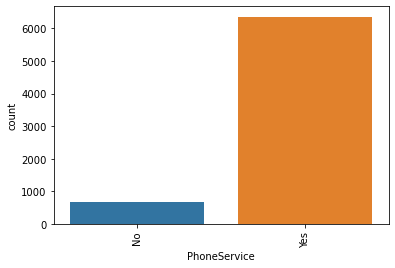



The Value Counts for the attribute "MultipleLines" is
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

The Countplot Diagram for the attribute "MultipleLines" is
 AxesSubplot(0.125,0.125;0.775x0.755)


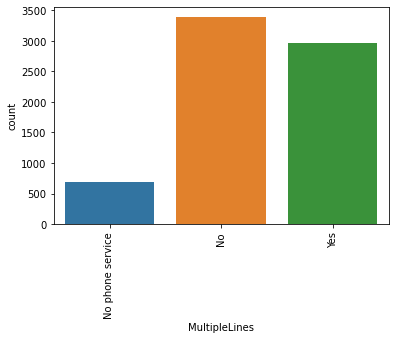



The Value Counts for the attribute "InternetService" is
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

The Countplot Diagram for the attribute "InternetService" is
 AxesSubplot(0.125,0.125;0.775x0.755)


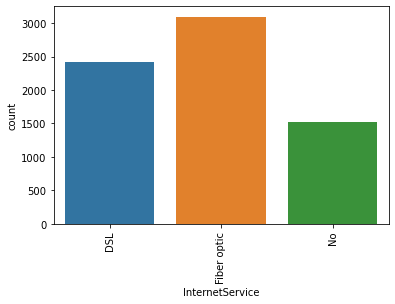



The Value Counts for the attribute "OnlineSecurity" is
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

The Countplot Diagram for the attribute "OnlineSecurity" is
 AxesSubplot(0.125,0.125;0.775x0.755)


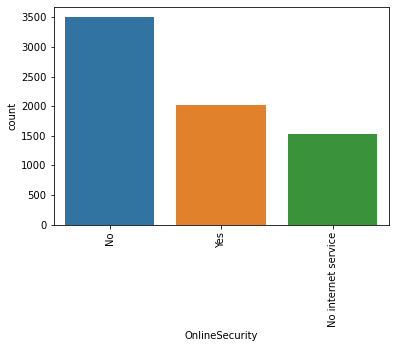



The Value Counts for the attribute "OnlineBackup" is
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

The Countplot Diagram for the attribute "OnlineBackup" is
 AxesSubplot(0.125,0.125;0.775x0.755)


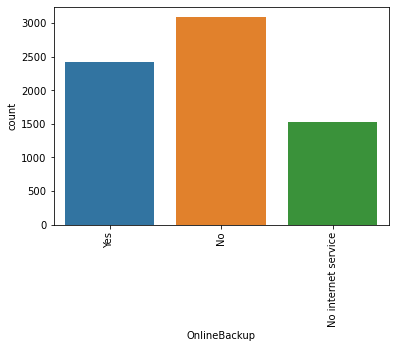



The Value Counts for the attribute "DeviceProtection" is
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

The Countplot Diagram for the attribute "DeviceProtection" is
 AxesSubplot(0.125,0.125;0.775x0.755)


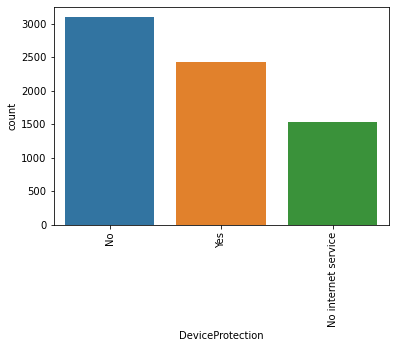



The Value Counts for the attribute "TechSupport" is
 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

The Countplot Diagram for the attribute "TechSupport" is
 AxesSubplot(0.125,0.125;0.775x0.755)


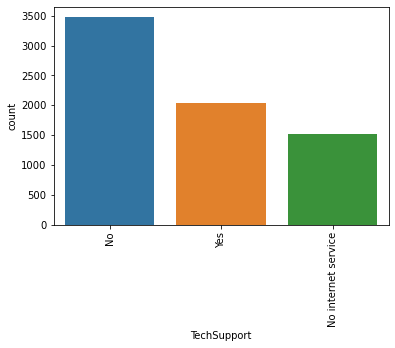



The Value Counts for the attribute "StreamingTV" is
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

The Countplot Diagram for the attribute "StreamingTV" is
 AxesSubplot(0.125,0.125;0.775x0.755)


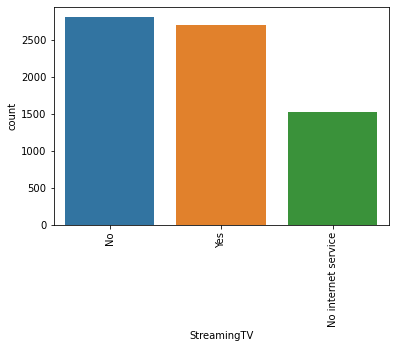



The Value Counts for the attribute "StreamingMovies" is
 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

The Countplot Diagram for the attribute "StreamingMovies" is
 AxesSubplot(0.125,0.125;0.775x0.755)


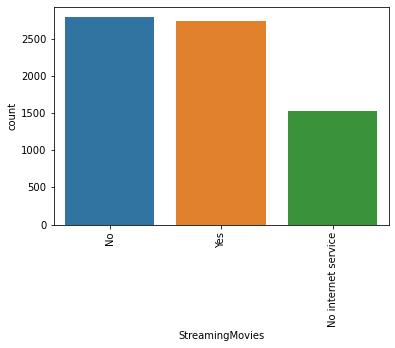



The Value Counts for the attribute "Contract" is
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

The Countplot Diagram for the attribute "Contract" is
 AxesSubplot(0.125,0.125;0.775x0.755)


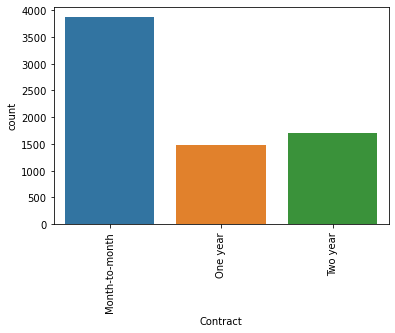



The Value Counts for the attribute "PaperlessBilling" is
 Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

The Countplot Diagram for the attribute "PaperlessBilling" is
 AxesSubplot(0.125,0.125;0.775x0.755)


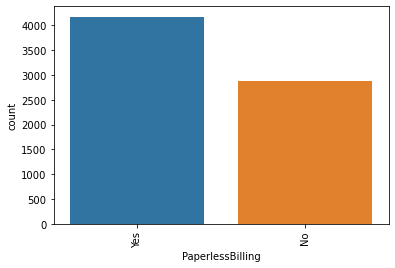



The Value Counts for the attribute "PaymentMethod" is
 Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

The Countplot Diagram for the attribute "PaymentMethod" is
 AxesSubplot(0.125,0.125;0.775x0.755)


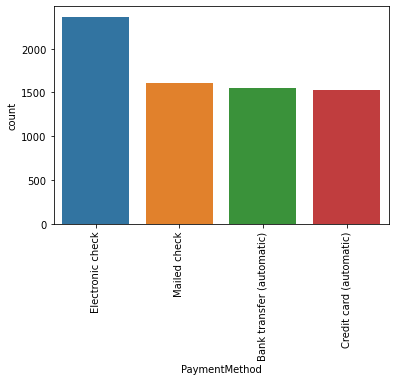



The Value Counts for the attribute "Churn" is
 No     5174
Yes    1869
Name: Churn, dtype: int64

The Countplot Diagram for the attribute "Churn" is
 AxesSubplot(0.125,0.125;0.775x0.755)


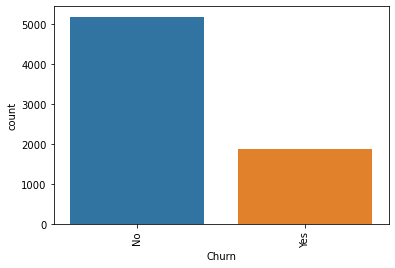

In [18]:
for i in df.columns.drop(['customerID','tenure','MonthlyCharges','TotalCharges']):
    print(f'The Value Counts for the attribute "{i}" is\n {df[i].value_counts()}')
    print(f'\nThe Countplot Diagram for the attribute "{i}" is\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

1.Male customers are more than female customers.

2.Senior citizens customers are only 1142

3.There are paperless billing available for 4171 customers.

4.Most of the Customers are using Payment method as Electronic Check.

# 2.Histogram

The Histogram Diagram for the attribute "gender" is
 AxesSubplot(0.125,0.125;0.775x0.755)


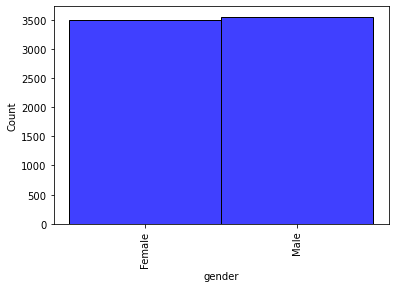



The Histogram Diagram for the attribute "SeniorCitizen" is
 AxesSubplot(0.125,0.125;0.775x0.755)


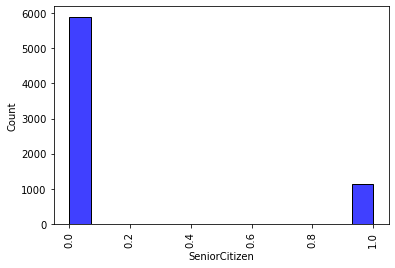



The Histogram Diagram for the attribute "Partner" is
 AxesSubplot(0.125,0.125;0.775x0.755)


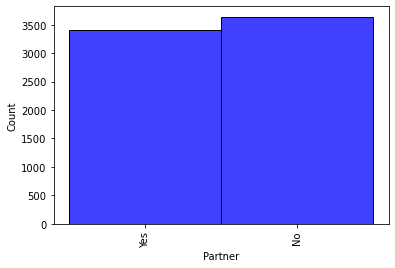



The Histogram Diagram for the attribute "Dependents" is
 AxesSubplot(0.125,0.125;0.775x0.755)


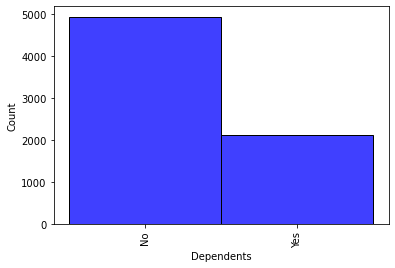



The Histogram Diagram for the attribute "PhoneService" is
 AxesSubplot(0.125,0.125;0.775x0.755)


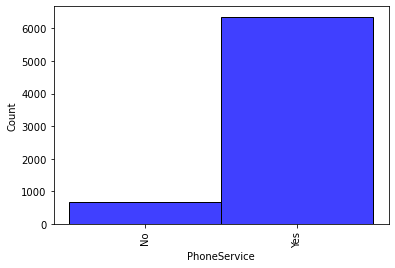



The Histogram Diagram for the attribute "MultipleLines" is
 AxesSubplot(0.125,0.125;0.775x0.755)


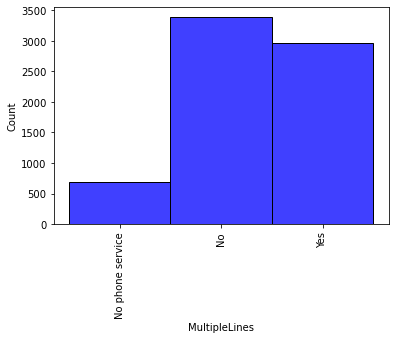



The Histogram Diagram for the attribute "InternetService" is
 AxesSubplot(0.125,0.125;0.775x0.755)


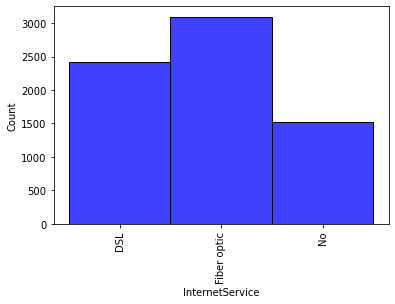



The Histogram Diagram for the attribute "OnlineSecurity" is
 AxesSubplot(0.125,0.125;0.775x0.755)


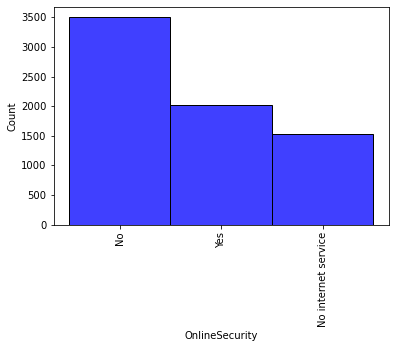



The Histogram Diagram for the attribute "OnlineBackup" is
 AxesSubplot(0.125,0.125;0.775x0.755)


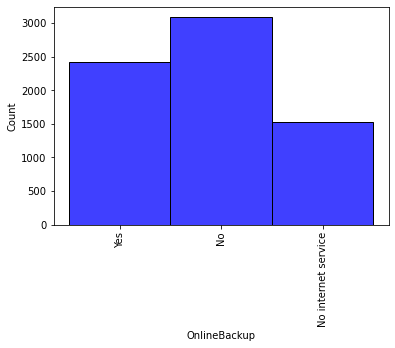



The Histogram Diagram for the attribute "DeviceProtection" is
 AxesSubplot(0.125,0.125;0.775x0.755)


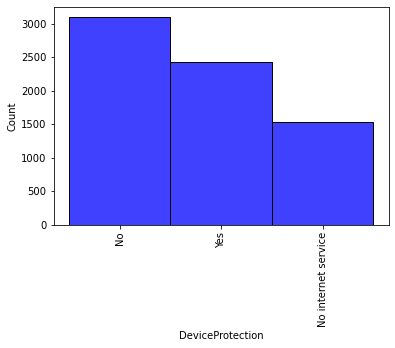



The Histogram Diagram for the attribute "TechSupport" is
 AxesSubplot(0.125,0.125;0.775x0.755)


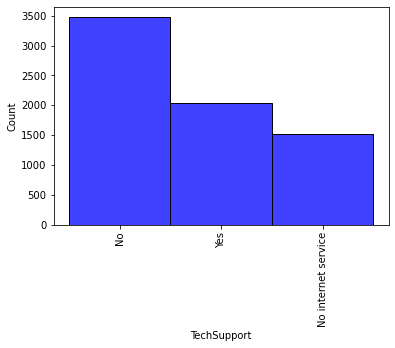



The Histogram Diagram for the attribute "StreamingTV" is
 AxesSubplot(0.125,0.125;0.775x0.755)


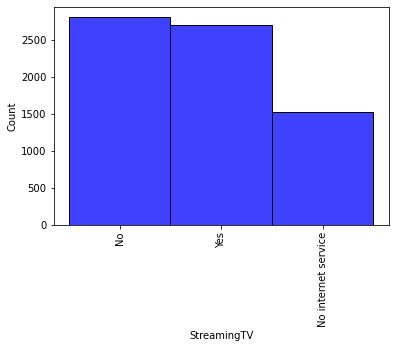



The Histogram Diagram for the attribute "StreamingMovies" is
 AxesSubplot(0.125,0.125;0.775x0.755)


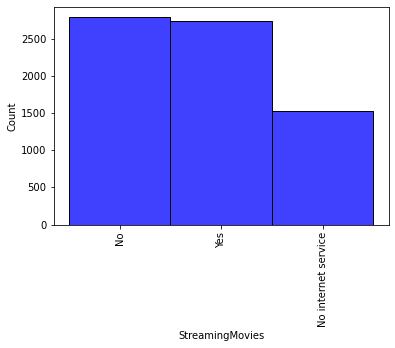



The Histogram Diagram for the attribute "Contract" is
 AxesSubplot(0.125,0.125;0.775x0.755)


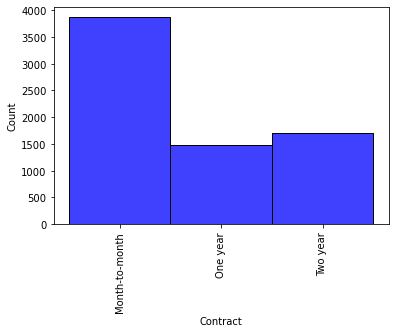



The Histogram Diagram for the attribute "PaperlessBilling" is
 AxesSubplot(0.125,0.125;0.775x0.755)


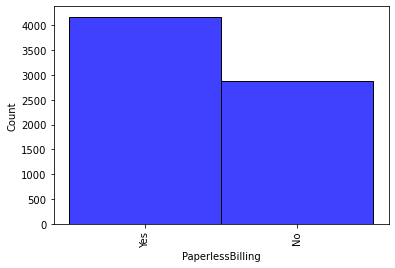



The Histogram Diagram for the attribute "PaymentMethod" is
 AxesSubplot(0.125,0.125;0.775x0.755)


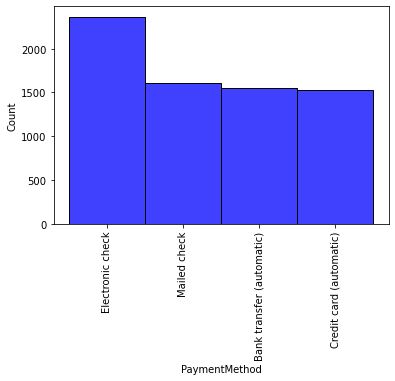



The Histogram Diagram for the attribute "Churn" is
 AxesSubplot(0.125,0.125;0.775x0.755)


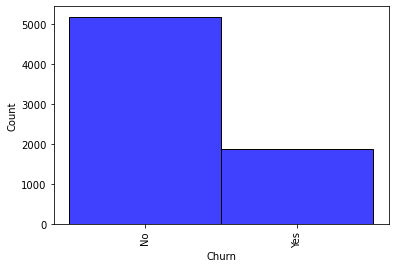

In [19]:
for i in df.columns.drop(['customerID','tenure','MonthlyCharges','TotalCharges']):
    print(f'The Histogram Diagram for the attribute "{i}" is\n {sns.histplot(df[i],color="b")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 3.Scatter Plot

The Scatter Plot for the attribute "Churn" & "gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


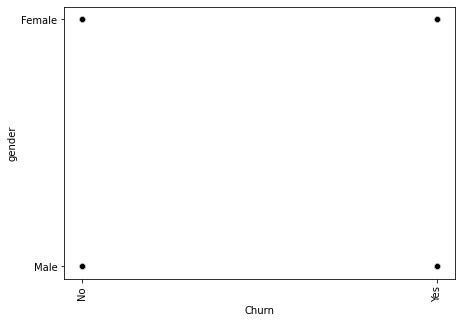



The Scatter Plot for the attribute "Churn" & "SeniorCitizen" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


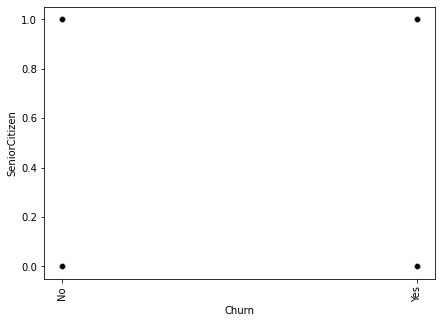



The Scatter Plot for the attribute "Churn" & "Partner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


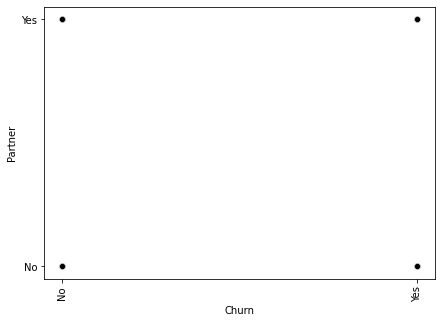



The Scatter Plot for the attribute "Churn" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


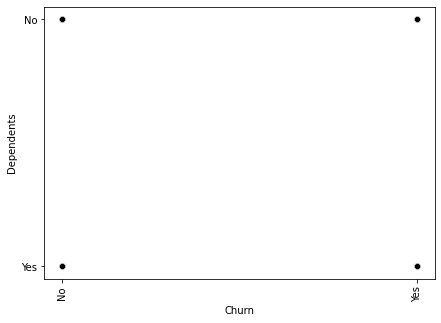



The Scatter Plot for the attribute "Churn" & "PhoneService" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


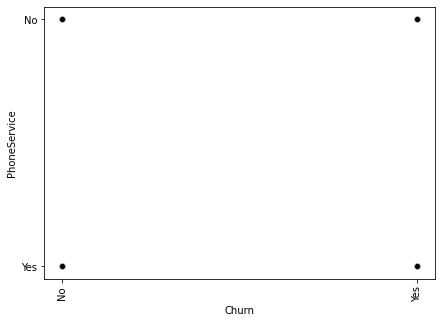



The Scatter Plot for the attribute "Churn" & "MultipleLines" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


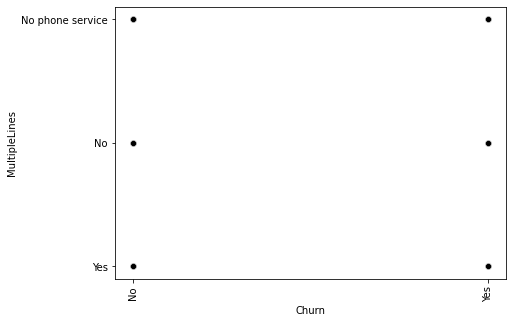



The Scatter Plot for the attribute "Churn" & "InternetService" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


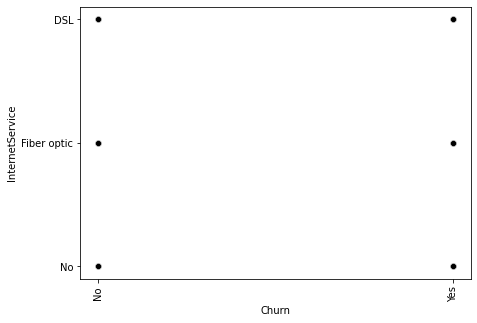



The Scatter Plot for the attribute "Churn" & "OnlineSecurity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


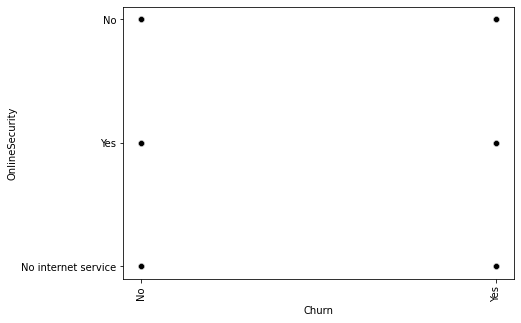



The Scatter Plot for the attribute "Churn" & "OnlineBackup" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


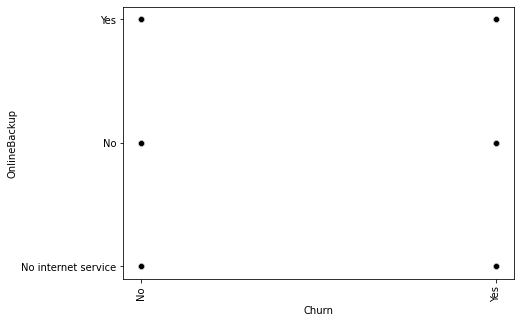



The Scatter Plot for the attribute "Churn" & "DeviceProtection" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


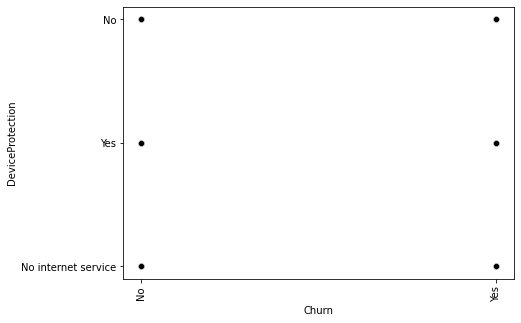



The Scatter Plot for the attribute "Churn" & "TechSupport" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


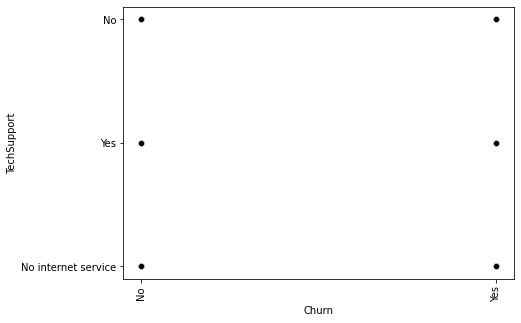



The Scatter Plot for the attribute "Churn" & "StreamingTV" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


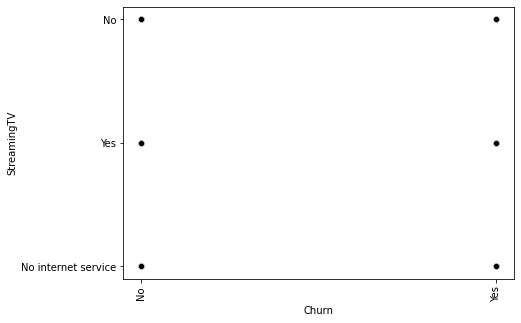



The Scatter Plot for the attribute "Churn" & "StreamingMovies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


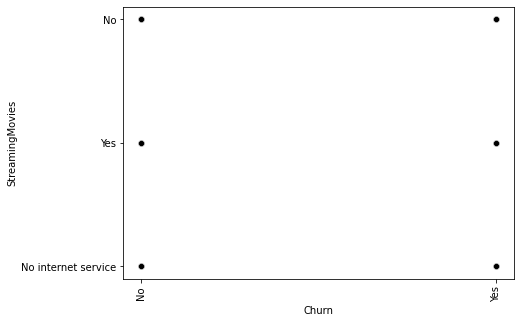



The Scatter Plot for the attribute "Churn" & "Contract" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


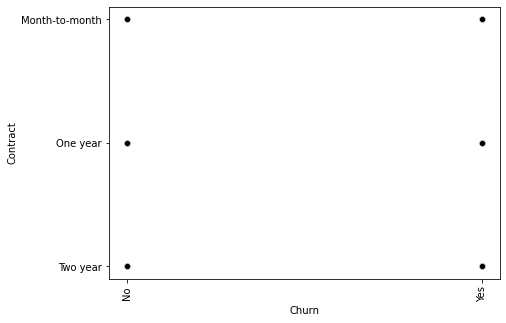



The Scatter Plot for the attribute "Churn" & "PaperlessBilling" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


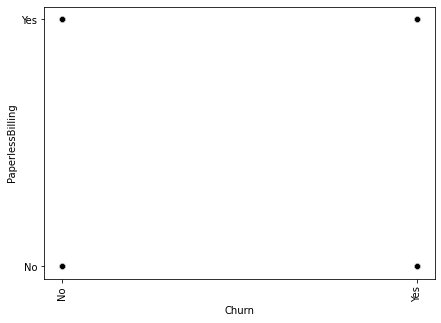



The Scatter Plot for the attribute "Churn" & "PaymentMethod" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


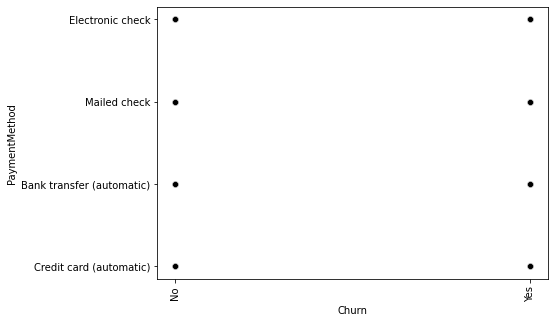



The Scatter Plot for the attribute "Churn" & "Churn" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


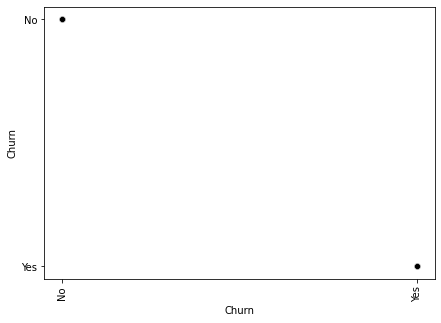

In [20]:
for i in df.columns.drop(['customerID','tenure','MonthlyCharges','TotalCharges']):
    plt.figure(figsize=(7,5))
    print(f'The Scatter Plot for the attribute "Churn" & "{i}" is-\n {sns.scatterplot(df.Churn,df[i],color="black")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 4.LinePlot

The Line Plot for the attribute "Churn" & "gender" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


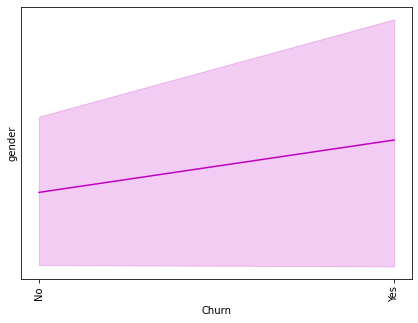



The Line Plot for the attribute "Churn" & "SeniorCitizen" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


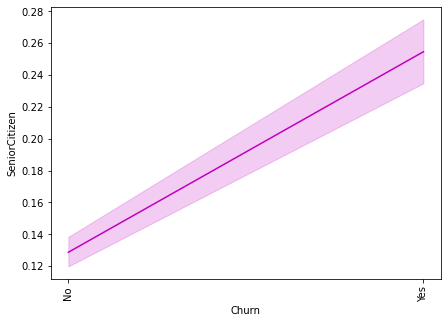



The Line Plot for the attribute "Churn" & "Partner" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


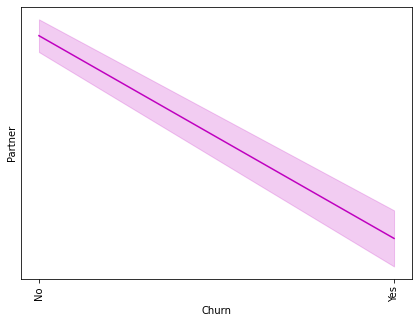



The Line Plot for the attribute "Churn" & "Dependents" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


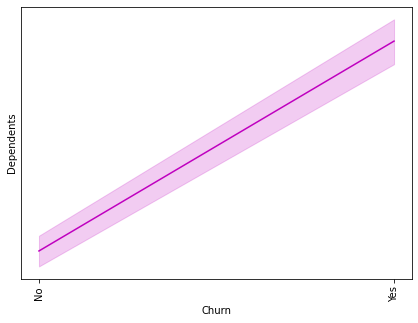



The Line Plot for the attribute "Churn" & "PhoneService" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


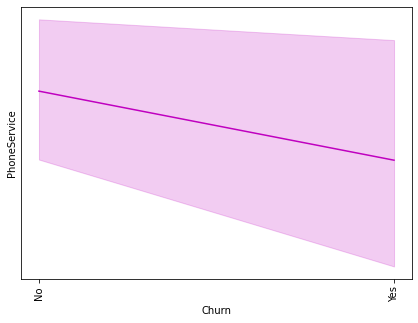



The Line Plot for the attribute "Churn" & "MultipleLines" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


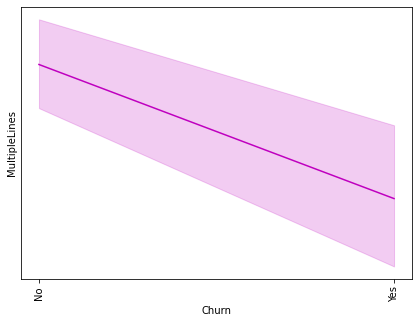



The Line Plot for the attribute "Churn" & "InternetService" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


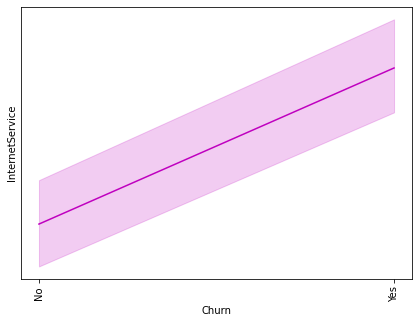



The Line Plot for the attribute "Churn" & "OnlineSecurity" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


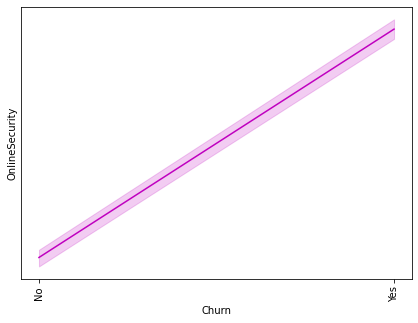



The Line Plot for the attribute "Churn" & "OnlineBackup" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


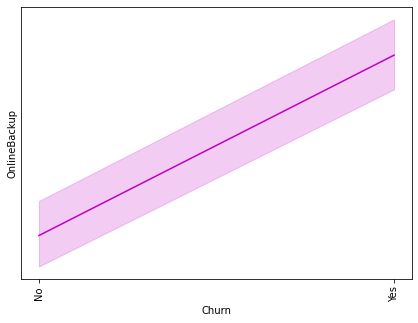



The Line Plot for the attribute "Churn" & "DeviceProtection" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


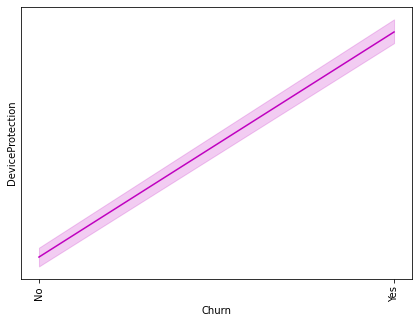



The Line Plot for the attribute "Churn" & "TechSupport" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


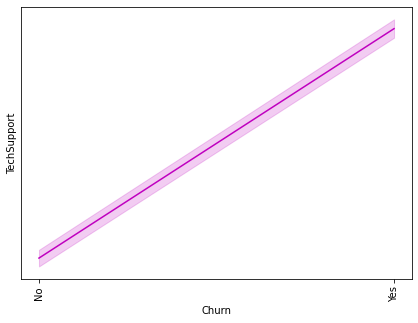



The Line Plot for the attribute "Churn" & "StreamingTV" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


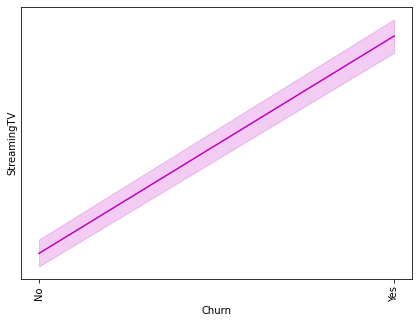



The Line Plot for the attribute "Churn" & "StreamingMovies" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


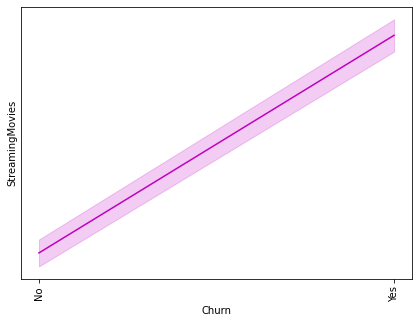



The Line Plot for the attribute "Churn" & "Contract" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


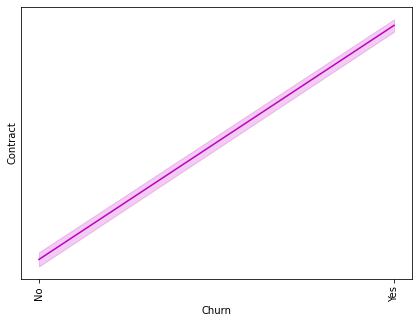



The Line Plot for the attribute "Churn" & "PaperlessBilling" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


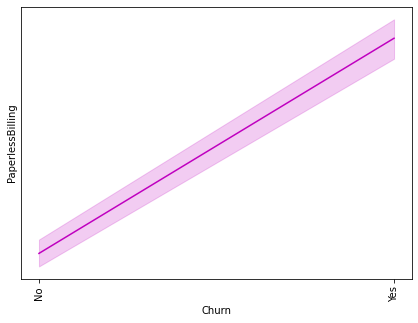



The Line Plot for the attribute "Churn" & "PaymentMethod" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


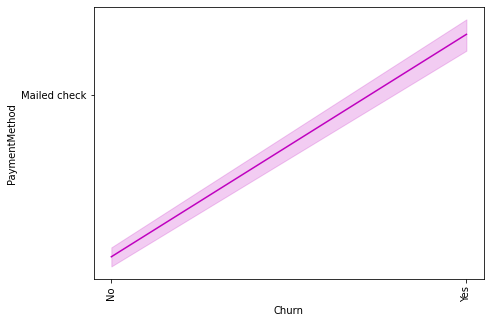



The Line Plot for the attribute "Churn" & "Churn" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


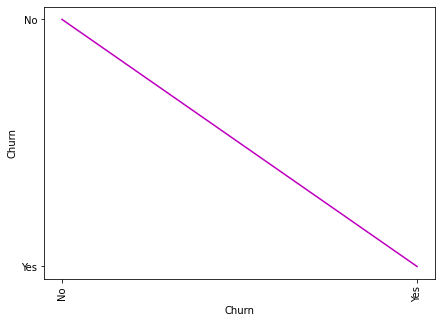

In [21]:
for i in df.columns.drop(['customerID','tenure','MonthlyCharges','TotalCharges']):
    plt.figure(figsize=(7,5))
    print(f'The Line Plot for the attribute "Churn" & "{i}" is-\n {sns.lineplot(df.Churn,df[i],color="m")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 5.Categorical Plotting

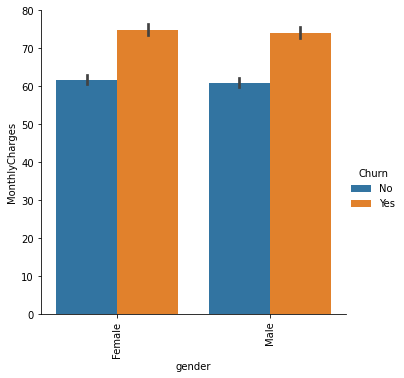

In [22]:
sns.catplot(x='gender',y='MonthlyCharges',hue='Churn',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Male and female customers those have monthly charges above 75 are highest chances to go to other shop and break the relation


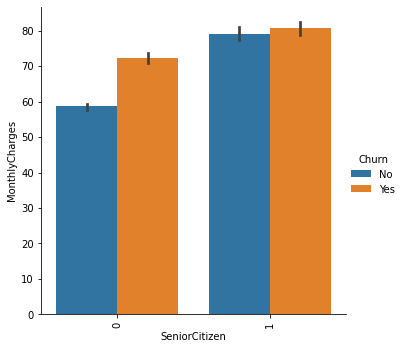

In [23]:
sns.catplot(x='SeniorCitizen',y='MonthlyCharges',hue='Churn',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

Senior citizens those monthly charges are above 80 are breaking the relation with existing shop

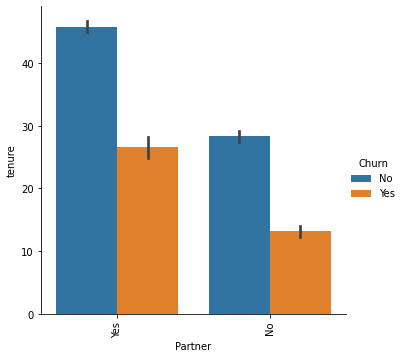

In [24]:
sns.catplot(x='Partner',y='tenure',hue='Churn',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

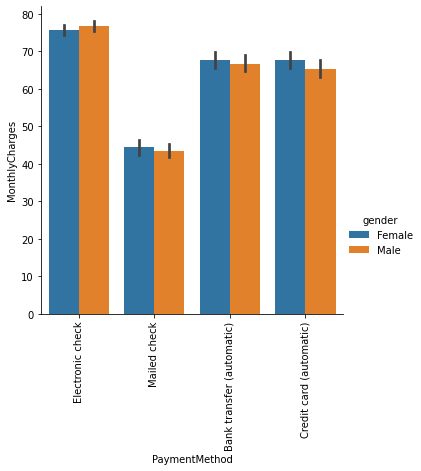

In [25]:
sns.catplot(x='PaymentMethod',y='MonthlyCharges',hue='gender',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

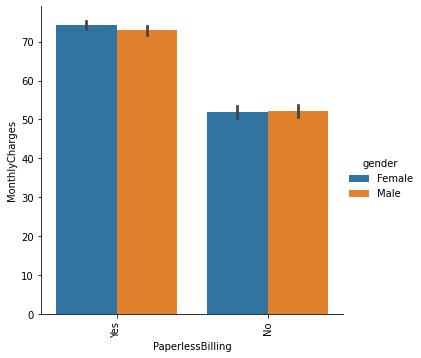

In [26]:
sns.catplot(x='PaperlessBilling',y='MonthlyCharges',hue='gender',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

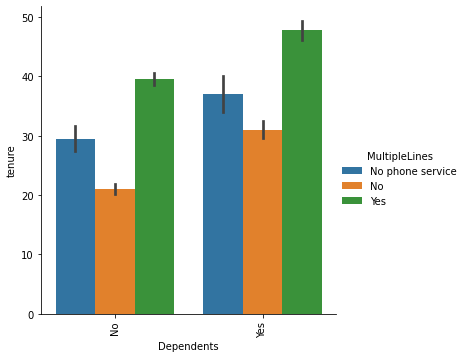

In [27]:
sns.catplot(x='Dependents',y='tenure',hue='MultipleLines',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

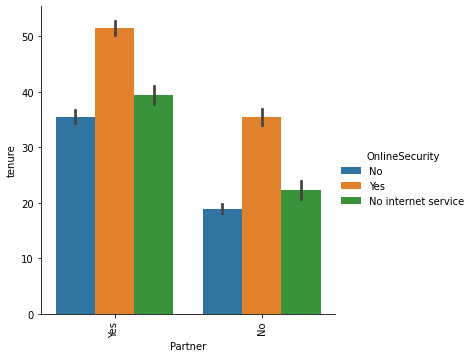

In [28]:
sns.catplot(x='Partner',y='tenure',hue='OnlineSecurity',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

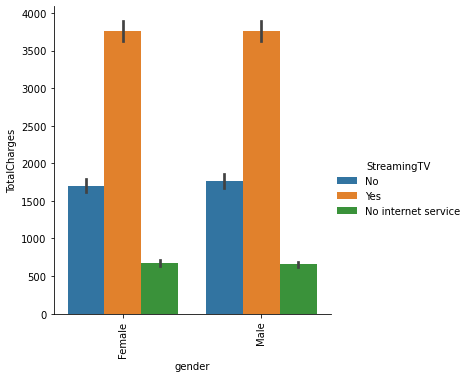

In [29]:
sns.catplot(x='gender',y='TotalCharges',hue='StreamingTV',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

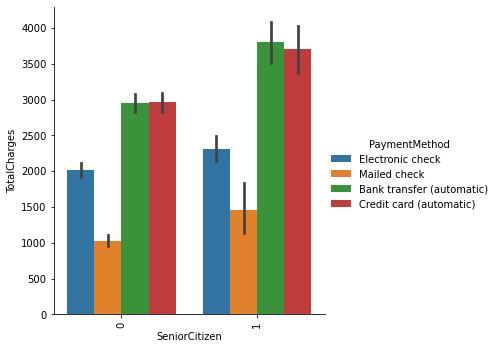

In [30]:
sns.catplot(x='SeniorCitizen',y='TotalCharges',hue='PaymentMethod',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

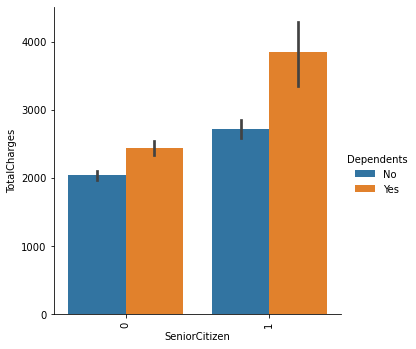

In [31]:
sns.catplot(x='SeniorCitizen',y='TotalCharges',hue='Dependents',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

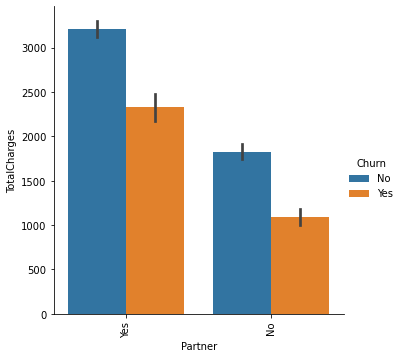

In [32]:
sns.catplot(x='Partner',y='TotalCharges',hue='Churn',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

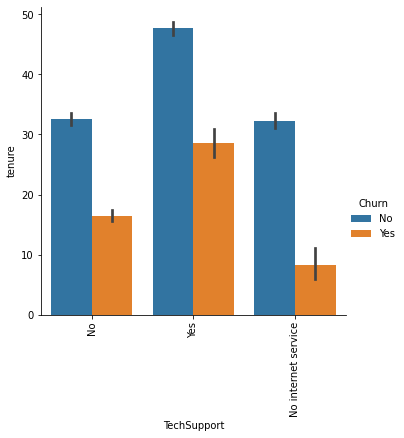

In [33]:
sns.catplot(x='TechSupport',y='tenure',hue='Churn',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

# Replacing the nan values with mean

In [34]:
df['TotalCharges']=df['TotalCharges'].replace(np.nan,df['TotalCharges'].mean())

In [35]:
df['TotalCharges'].isnull().sum()

0

# Label Encoding

In [36]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [37]:
l=['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for j in l:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

In [38]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1  

[5 rows x 21 columns]

In [39]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

> 0 represents Customer churning is not there
>1 represents Customer churning is there

# 6.ViolinPlot

The Violin-Plot for the attribute customerID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


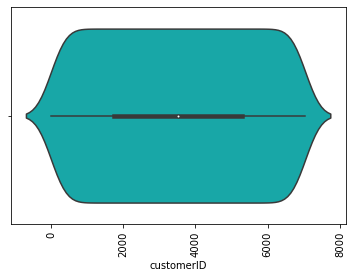



The Violin-Plot for the attribute gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


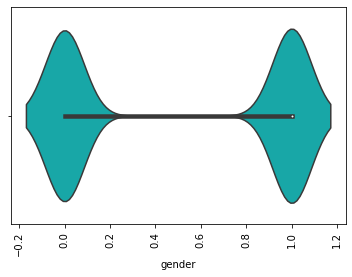



The Violin-Plot for the attribute SeniorCitizen is-
 AxesSubplot(0.125,0.125;0.775x0.755)


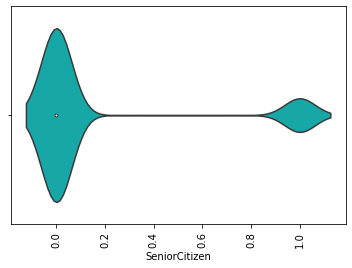



The Violin-Plot for the attribute Partner is-
 AxesSubplot(0.125,0.125;0.775x0.755)


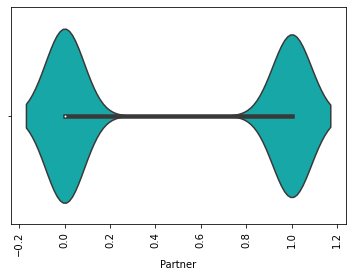



The Violin-Plot for the attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


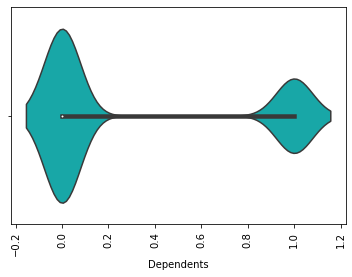



The Violin-Plot for the attribute tenure is-
 AxesSubplot(0.125,0.125;0.775x0.755)


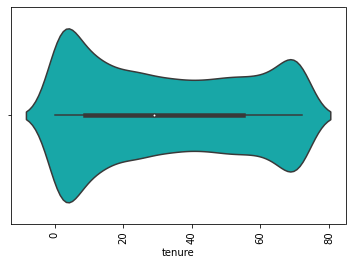



The Violin-Plot for the attribute PhoneService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


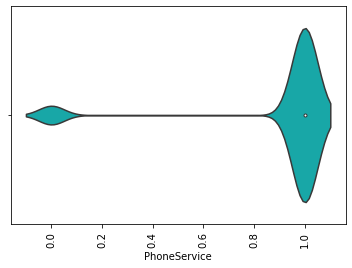



The Violin-Plot for the attribute MultipleLines is-
 AxesSubplot(0.125,0.125;0.775x0.755)


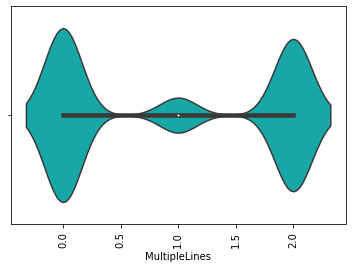



The Violin-Plot for the attribute InternetService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


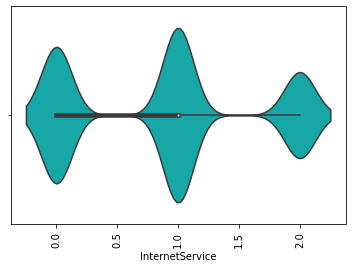



The Violin-Plot for the attribute OnlineSecurity is-
 AxesSubplot(0.125,0.125;0.775x0.755)


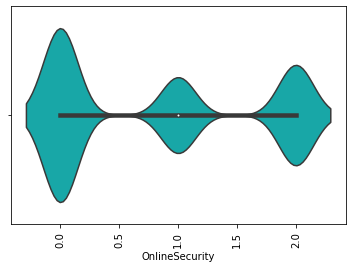



The Violin-Plot for the attribute OnlineBackup is-
 AxesSubplot(0.125,0.125;0.775x0.755)


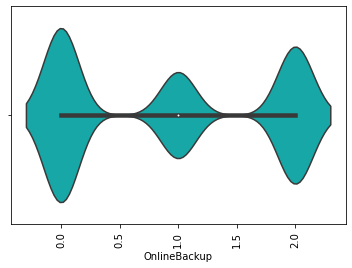



The Violin-Plot for the attribute DeviceProtection is-
 AxesSubplot(0.125,0.125;0.775x0.755)


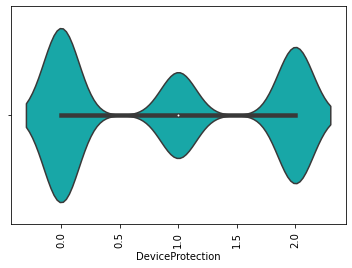



The Violin-Plot for the attribute TechSupport is-
 AxesSubplot(0.125,0.125;0.775x0.755)


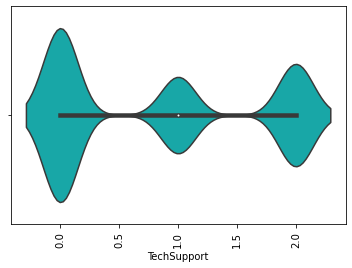



The Violin-Plot for the attribute StreamingTV is-
 AxesSubplot(0.125,0.125;0.775x0.755)


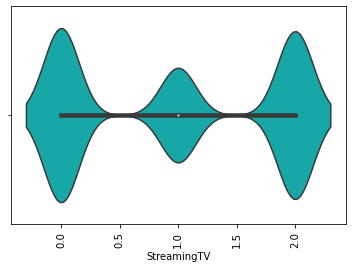



The Violin-Plot for the attribute StreamingMovies is-
 AxesSubplot(0.125,0.125;0.775x0.755)


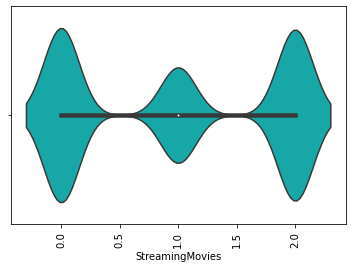



The Violin-Plot for the attribute Contract is-
 AxesSubplot(0.125,0.125;0.775x0.755)


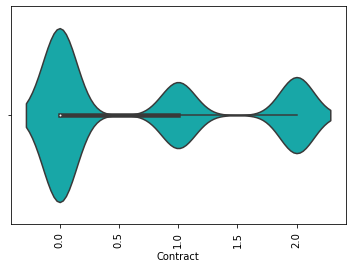



The Violin-Plot for the attribute PaperlessBilling is-
 AxesSubplot(0.125,0.125;0.775x0.755)


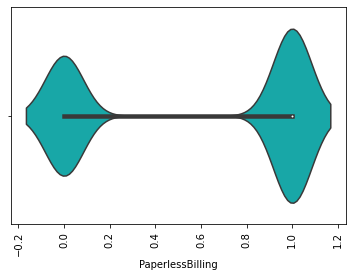



The Violin-Plot for the attribute PaymentMethod is-
 AxesSubplot(0.125,0.125;0.775x0.755)


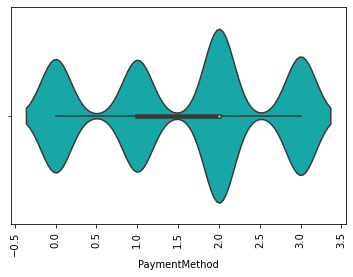



The Violin-Plot for the attribute MonthlyCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


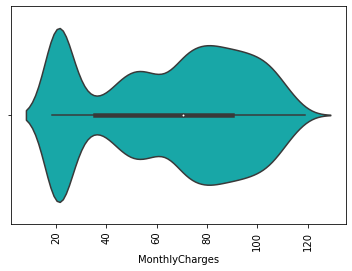



The Violin-Plot for the attribute TotalCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


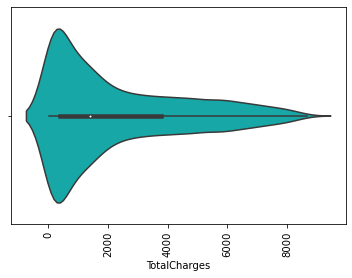



The Violin-Plot for the attribute Churn is-
 AxesSubplot(0.125,0.125;0.775x0.755)


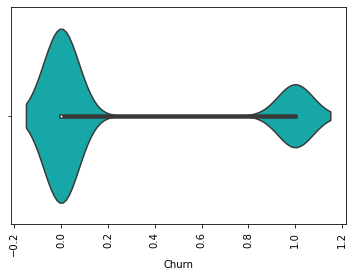

In [40]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute {i} is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

# 7.Pairplot

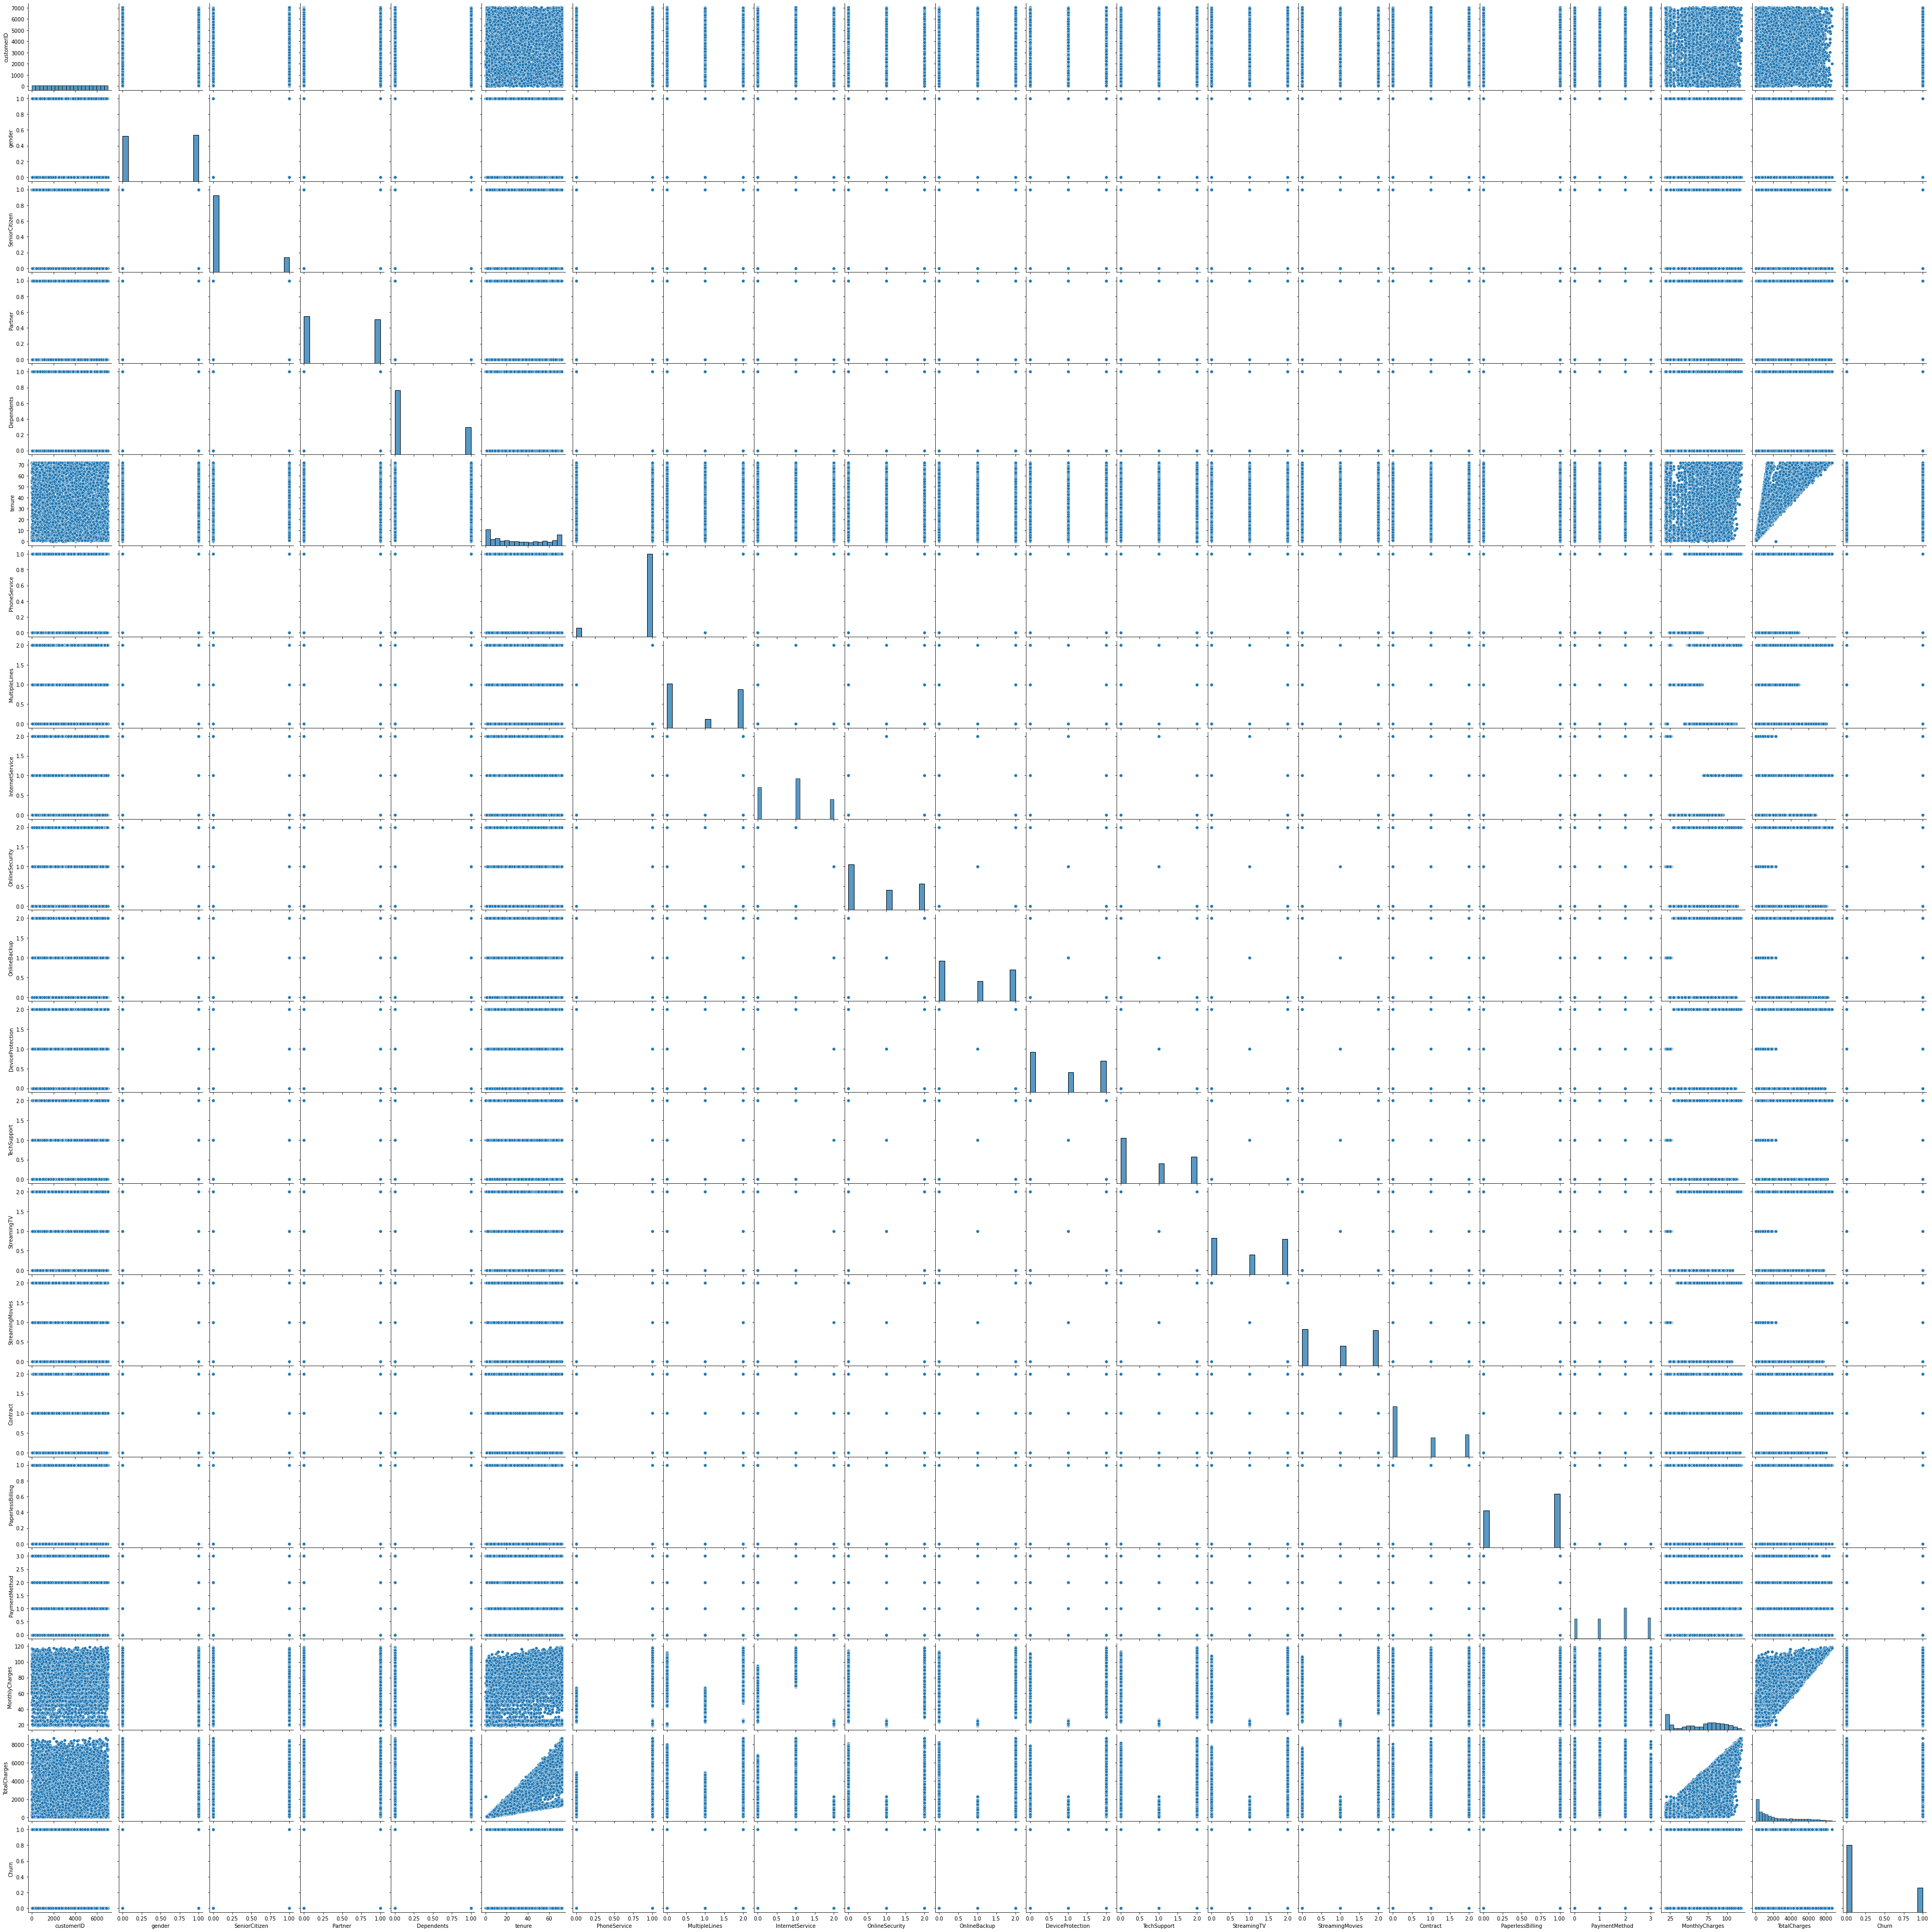

In [41]:
sns.pairplot(df)
plt.show()

# Descriptive Statistics

In [42]:
df.describe().T

count         mean          std    min       25%      50%  \
customerID        7043.0  3521.000000  2033.283305   0.00  1760.500  3521.00   
gender            7043.0     0.504756     0.500013   0.00     0.000     1.00   
SeniorCitizen     7043.0     0.162147     0.368612   0.00     0.000     0.00   
Partner           7043.0     0.483033     0.499748   0.00     0.000     0.00   
Dependents        7043.0     0.299588     0.458110   0.00     0.000     0.00   
tenure            7043.0    32.371149    24.559481   0.00     9.000    29.00   
PhoneService      7043.0     0.903166     0.295752   0.00     1.000     1.00   
MultipleLines     7043.0     0.940508     0.948554   0.00     0.000     1.00   
InternetService   7043.0     0.872923     0.737796   0.00     0.000     1.00   
OnlineSecurity    7043.0     0.790004     0.859848   0.00     0.000     1.00   
OnlineBackup      7043.0     0.906432     0.880162   0.00     0.000     1.00   
DeviceProtection  7043.0     0.904444     0.879949   0.00     0.000     1.00   
TechSupport       7043.0     0.797104     0.861551   0.00     0.000     1.00   
StreamingTV       7043.0     0.985376     0.885002   0.00     0.000     1.00   
StreamingMovies   7043.0     0.992475     0.885091   0.00     0.000     1.00   
Contract          7043.0     0.690473     0.833755   0.00     0.000     0.00   
PaperlessBilling  7043.0     0.592219     0.491457   0.00     0.000     1.00   
PaymentMethod     7043.0     1.574329     1.068104   0.00     1.000     2.00   
MonthlyCharges    7043.0    64.761692    30.090047  18.25    35.500    70.35   
TotalCharges      7043.0  2283.300441  2265.000258  18.80   402.225  1400.55   
Churn             7043.0     0.265370     0.441561   0.00     0.000     0.00   

                      75%      max  
customerID        5281.50  7042.00  
gender               1.00     1.00  
SeniorCitizen        0.00     1.00  
Partner              1.00     1.00  
Dependents           1.00     1.00  
tenure              55.00    72.00  
PhoneService         1.00     1.00  
MultipleLines        2.00     2.00  
InternetService      1.00     2.00  
OnlineSecurity       2.00     2.00  
OnlineBackup         2.00     2.00  
DeviceProtection     2.00     2.00  
TechSupport          2.00     2.00  
StreamingTV          2.00     2.00  
StreamingMovies      2.00     2.00  
Contract             1.00     2.00  
PaperlessBilling     1.00     1.00  
PaymentMethod        2.00     3.00  
MonthlyCharges      89.85   118.75  
TotalCharges      3786.60  8684.80  
Churn                1.00     1.00

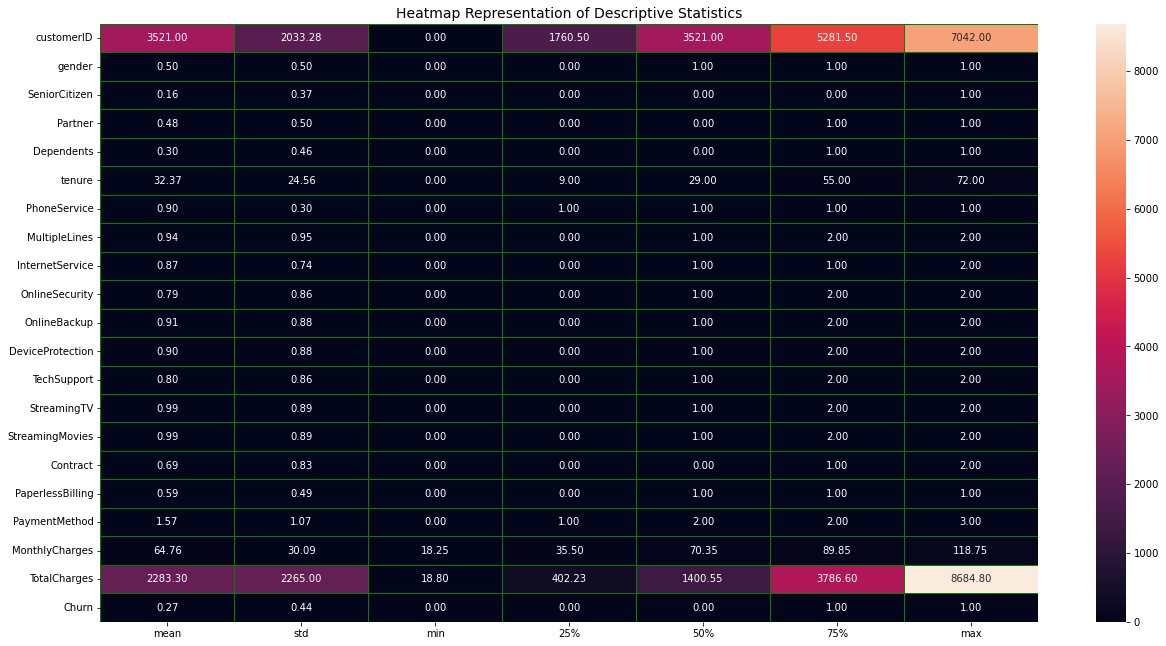

In [43]:
plt.figure(figsize=(21,11))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

# Correlation

In [44]:
df.corr()

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.013292 -0.015017      -0.128221  0.150828    0.152166   
OnlineBackup       -0.003334 -0.012057      -0.013632  0.153130    0.091015   
DeviceProtection   -0.006918  0.000549      -0.021398  0.166330    0.080537   
TechSupport         0.001140 -0.006825      -0.151268  0.126733    0.133524   
StreamingTV        -0.007777 -0.006421       0.030776  0.137341    0.046885   
StreamingMovies    -0.016746 -0.008743       0.047266  0.129574    0.021321   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
MonthlyCharges     -0.003916 -0.014569       0.220173  0.096848   -0.113890   
TotalCharges       -0.000270  0.000048       0.102395  0.318812    0.064535   
Churn              -0.017447 -0.008612       0.150889 -0.150448   -0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.325468     -0.015198       0.007141        -0.028416   
OnlineBackup      0.370876      0.024105       0.117327         0.036138   
DeviceProtection  0.371105      0.003727       0.122318         0.044944   
TechSupport       0.322942     -0.019158       0.011466        -0.026047   
StreamingTV       0.289373      0.055353       0.175059         0.107417   
StreamingMovies   0.296866      0.043870       0.180957         0.098350   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
MonthlyCharges    0.247900      0.247398       0.433576        -0.323260   
TotalCharges      0.824757      0.112851       0.452883        -0.175429   
Churn            -0.352229      0.011942       0.038037        -0.047291   

                  OnlineSecurity  ...  DeviceProtection  TechSupport  \
customerID              0.013292  ...         -0.006918     0.001140   
gender                 -0.015017  ...          0.000549    -0.006825   
SeniorCitizen          -0.128221  ...         -0.021398    -0.151268   
Partner                 0.150828  ...          0.166330     0.126733   
Dependents              0.152166  ...          0.080537     0.133524   
tenure                  0.325468  ...          0.371105     0.322942   
PhoneService           -0.015198  ...          0.003727    -0.019158   
MultipleLines           0.0071

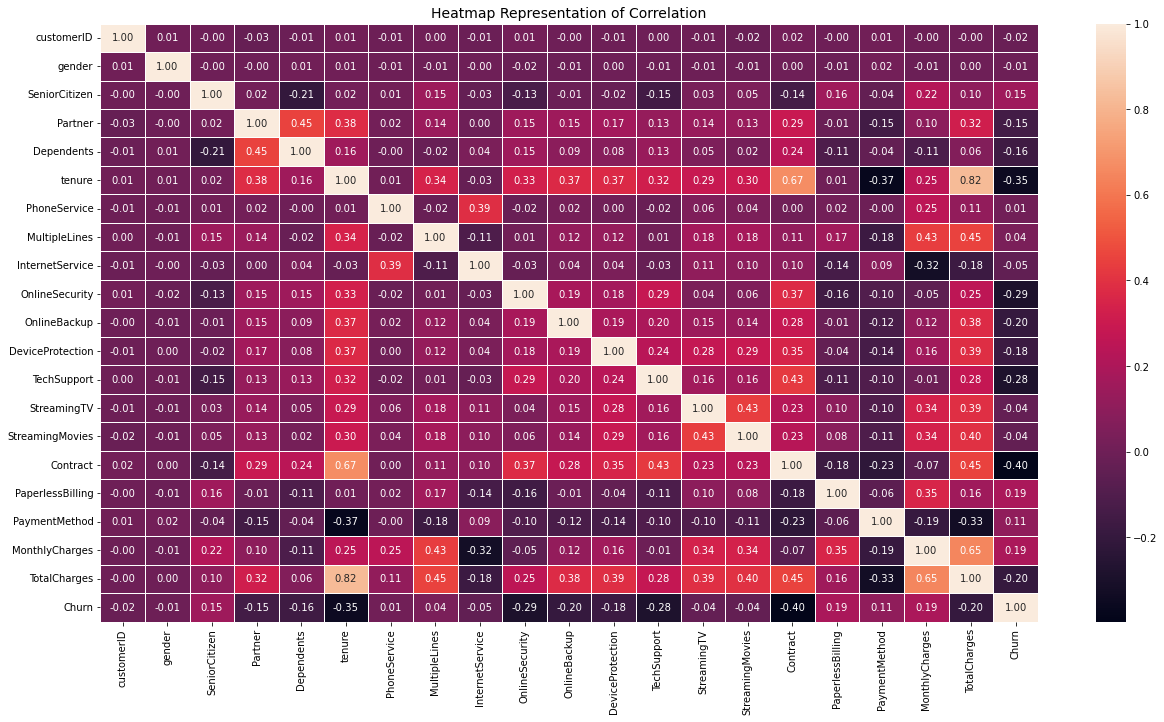

In [45]:
plt.figure(figsize=(21,11))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

# Multicollinearity

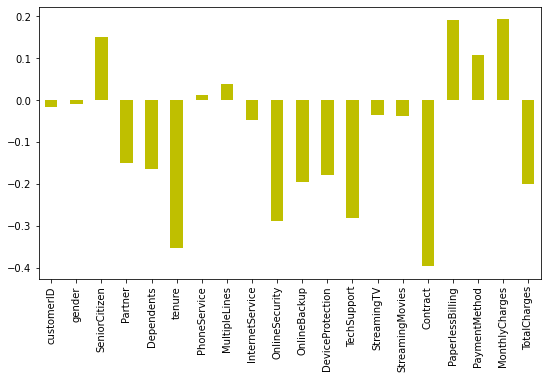

In [46]:
plt.figure(figsize=(9,5))
df.corr().Churn.drop(['Churn']).plot(kind='bar',color='y')
plt.show()

# Skewness

In [47]:
df.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

If we consider the threshold value for skewness as +/-0.5 then we can see that attributes-PhoneService,Contract,Dependents,TotalCharges,Churn,SeniorCitizen are having skewed either right or left but I will remove skewness only in the attribute TotalCharges as rest are either categorical or target variable.

# Distribution Plot

Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute customerID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


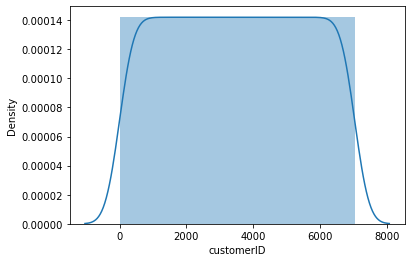



The Distribution Plot for attribute gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


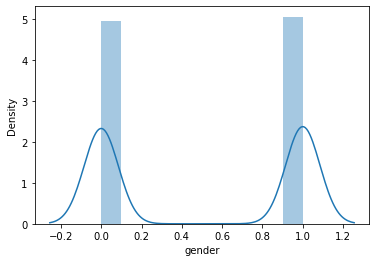



The Distribution Plot for attribute SeniorCitizen is-
 AxesSubplot(0.125,0.125;0.775x0.755)


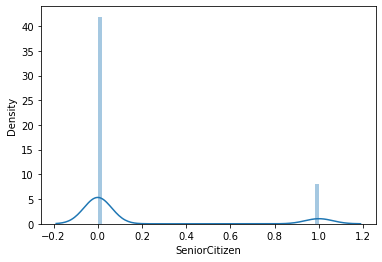



The Distribution Plot for attribute Partner is-
 AxesSubplot(0.125,0.125;0.775x0.755)


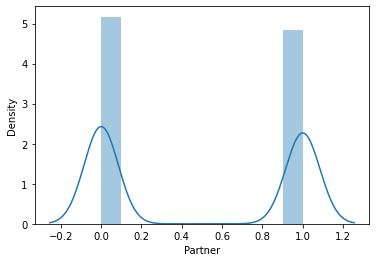



The Distribution Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


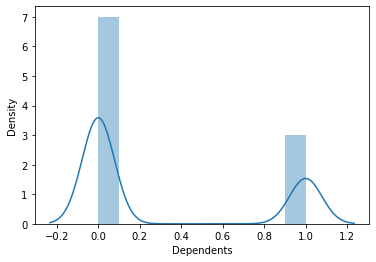



The Distribution Plot for attribute tenure is-
 AxesSubplot(0.125,0.125;0.775x0.755)


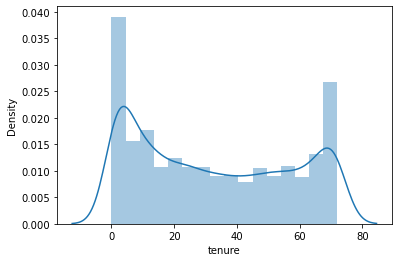



The Distribution Plot for attribute PhoneService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


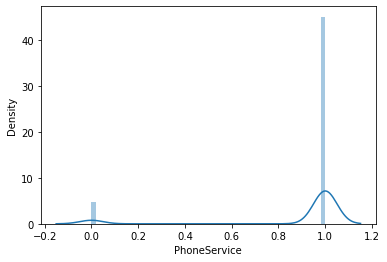



The Distribution Plot for attribute MultipleLines is-
 AxesSubplot(0.125,0.125;0.775x0.755)


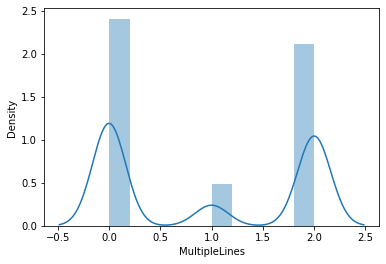



The Distribution Plot for attribute InternetService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


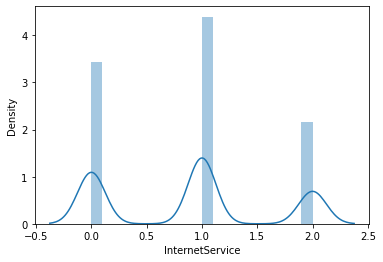



The Distribution Plot for attribute OnlineSecurity is-
 AxesSubplot(0.125,0.125;0.775x0.755)


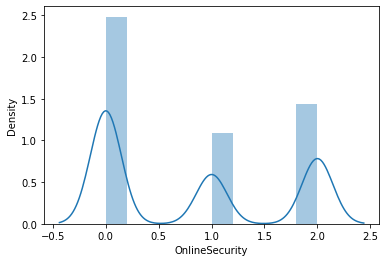



The Distribution Plot for attribute OnlineBackup is-
 AxesSubplot(0.125,0.125;0.775x0.755)


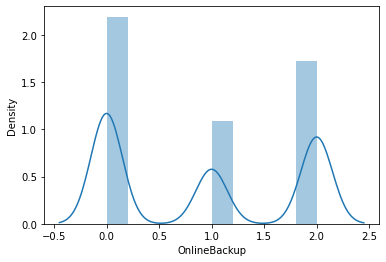



The Distribution Plot for attribute DeviceProtection is-
 AxesSubplot(0.125,0.125;0.775x0.755)


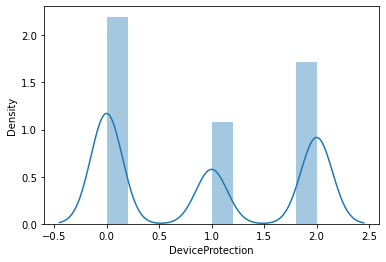



The Distribution Plot for attribute TechSupport is-
 AxesSubplot(0.125,0.125;0.775x0.755)


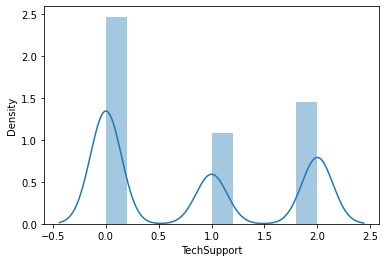



The Distribution Plot for attribute StreamingTV is-
 AxesSubplot(0.125,0.125;0.775x0.755)


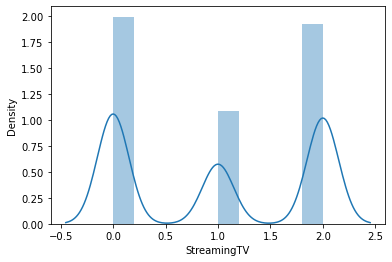



The Distribution Plot for attribute StreamingMovies is-
 AxesSubplot(0.125,0.125;0.775x0.755)


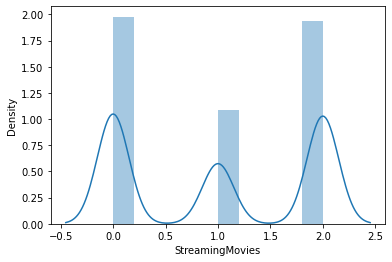



The Distribution Plot for attribute Contract is-
 AxesSubplot(0.125,0.125;0.775x0.755)


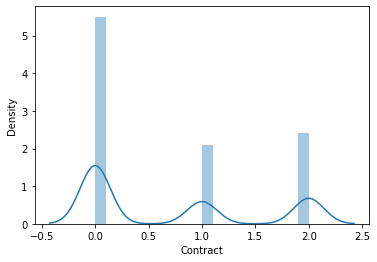



The Distribution Plot for attribute PaperlessBilling is-
 AxesSubplot(0.125,0.125;0.775x0.755)


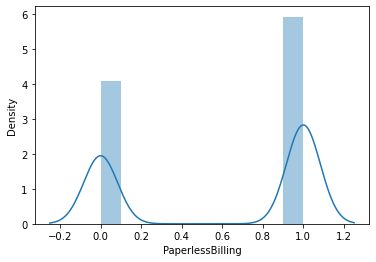



The Distribution Plot for attribute PaymentMethod is-
 AxesSubplot(0.125,0.125;0.775x0.755)


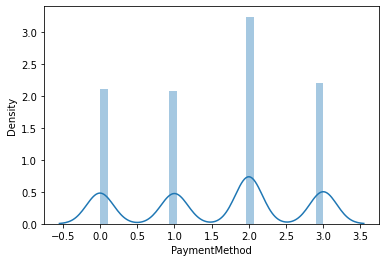



The Distribution Plot for attribute MonthlyCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


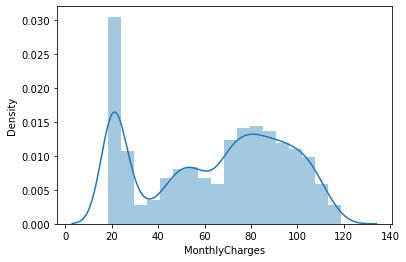



The Distribution Plot for attribute TotalCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


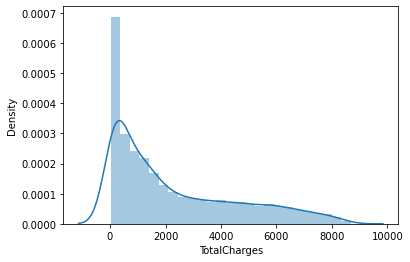



The Distribution Plot for attribute Churn is-
 AxesSubplot(0.125,0.125;0.775x0.755)


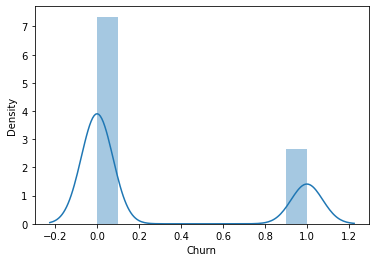

In [48]:
for i in df.columns:
    print(f'The Distribution Plot for attribute {i} is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

# Outliers

In [49]:
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

This is showing that attribute at 6th place (7th column)i.e. only PhoneService have outliers presence but it's in categorical form hence will not remove any outliers for the same

In [50]:
print(z.iloc[3,6])
print(z.iloc[7,6])
print(z.iloc[20,6])

3.054010391622917
3.054010391622917
3.054010391622917


# Boxplots To check the Outliers

The Box-Plot for attribute customerID is-
 AxesSubplot(0.125,0.125;0.775x0.755)


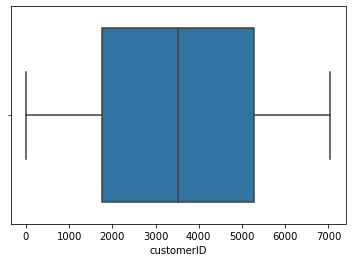



The Box-Plot for attribute gender is-
 AxesSubplot(0.125,0.125;0.775x0.755)


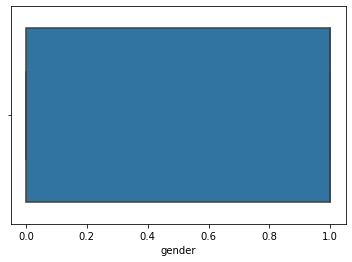



The Box-Plot for attribute SeniorCitizen is-
 AxesSubplot(0.125,0.125;0.775x0.755)


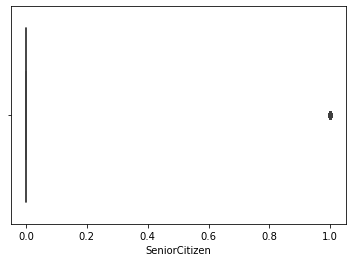



The Box-Plot for attribute Partner is-
 AxesSubplot(0.125,0.125;0.775x0.755)


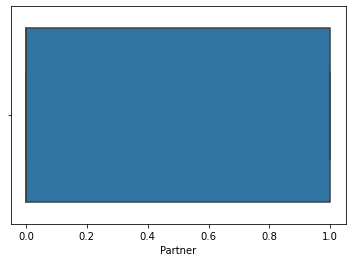



The Box-Plot for attribute Dependents is-
 AxesSubplot(0.125,0.125;0.775x0.755)


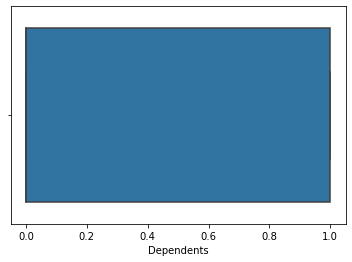



The Box-Plot for attribute tenure is-
 AxesSubplot(0.125,0.125;0.775x0.755)


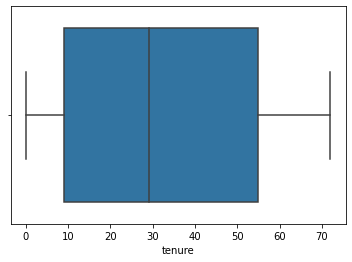



The Box-Plot for attribute PhoneService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


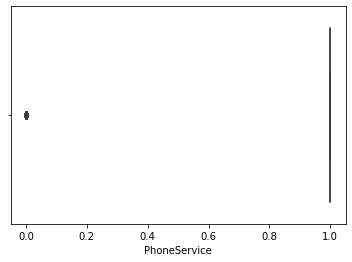



The Box-Plot for attribute MultipleLines is-
 AxesSubplot(0.125,0.125;0.775x0.755)


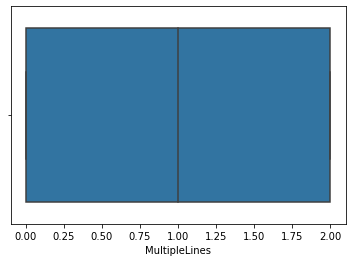



The Box-Plot for attribute InternetService is-
 AxesSubplot(0.125,0.125;0.775x0.755)


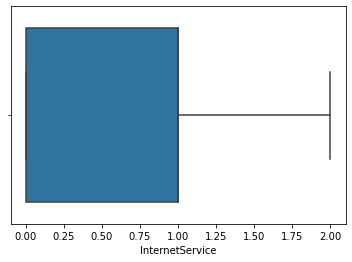



The Box-Plot for attribute OnlineSecurity is-
 AxesSubplot(0.125,0.125;0.775x0.755)


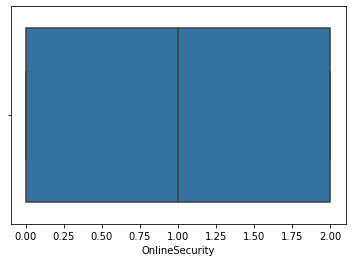



The Box-Plot for attribute OnlineBackup is-
 AxesSubplot(0.125,0.125;0.775x0.755)


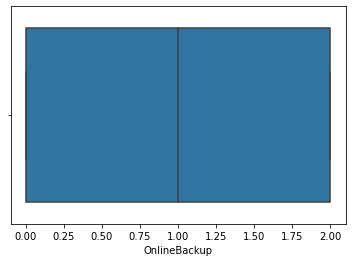



The Box-Plot for attribute DeviceProtection is-
 AxesSubplot(0.125,0.125;0.775x0.755)


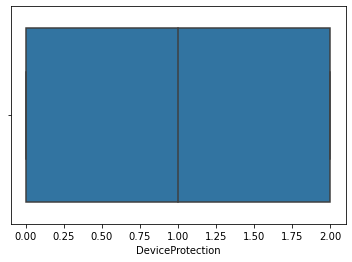



The Box-Plot for attribute TechSupport is-
 AxesSubplot(0.125,0.125;0.775x0.755)


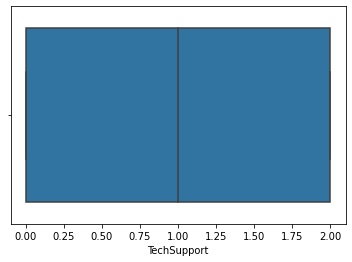



The Box-Plot for attribute StreamingTV is-
 AxesSubplot(0.125,0.125;0.775x0.755)


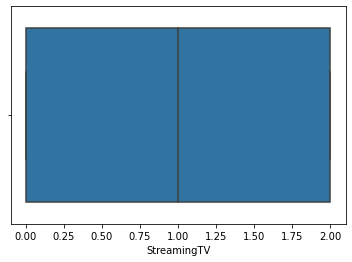



The Box-Plot for attribute StreamingMovies is-
 AxesSubplot(0.125,0.125;0.775x0.755)


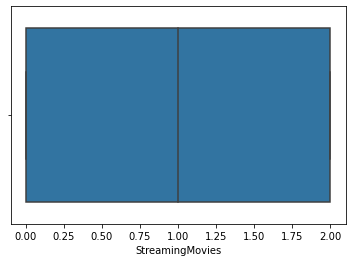



The Box-Plot for attribute Contract is-
 AxesSubplot(0.125,0.125;0.775x0.755)


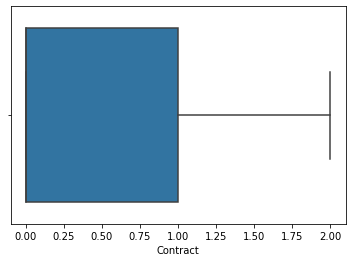



The Box-Plot for attribute PaperlessBilling is-
 AxesSubplot(0.125,0.125;0.775x0.755)


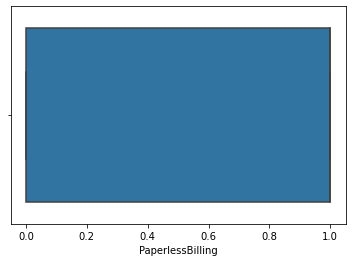



The Box-Plot for attribute PaymentMethod is-
 AxesSubplot(0.125,0.125;0.775x0.755)


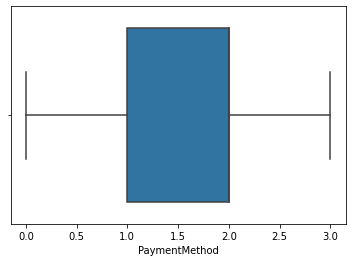



The Box-Plot for attribute MonthlyCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


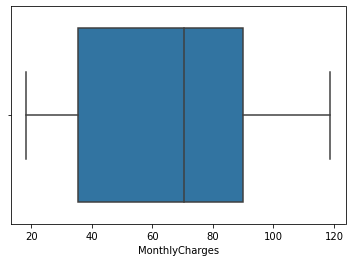



The Box-Plot for attribute TotalCharges is-
 AxesSubplot(0.125,0.125;0.775x0.755)


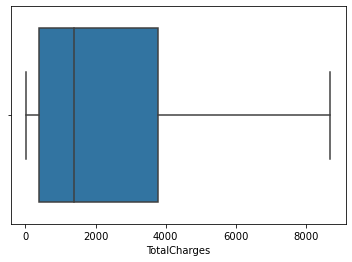



The Box-Plot for attribute Churn is-
 AxesSubplot(0.125,0.125;0.775x0.755)


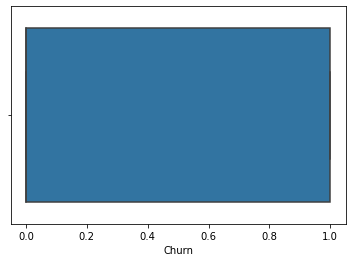

In [51]:
for i in df.columns:
    print(f'The Box-Plot for attribute {i} is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

Box plot is showing that attributes- SeniorCitizen,PhoneService are having outliers but as they both are in string categorical form in nature hence will not remove any outliers as outlier concept is not applicable over categorical columns as we can't find the mean for the calculation purpose

# Data Cleansing

# 1.Remove Negative Correlation

In [52]:
# droping all the negative numeric columns having negative correlation and skip all the categorical negative correlated columns
df1=df.drop(['tenure','TotalCharges'],axis=1)
df1

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0           5375       0              0        1           0             0   
1           3962       1              0        0           0             1   
2           2564       1              0        0           0             1   
3           5535       1              0        0           0             0   
4           6511       0              0        0           0             1   
...          ...     ...            ...      ...         ...           ...   
7038        4853       1              0        1           1             1   
7039        1525       0              0        1           1             1   
7040        3367       0              0        1           1             0   
7041        5934       1              1        1           0             1   
7042        2226       1              0        0           0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
0                    1              2           29.85      0  
1                    0              3           56.95      0  
2                    1              3           53.85      1  
3                    0              0           42.30      0  
4                    1              2           70.70      1  
...                ...            ...             ...    ...  
7038                 1              3           84.80      0  
7039                 1              1          103.20      0  
7040                 1              2           29.60      0  
7041                 1              3           74.40      1  
7042                 1              0          105.65      0  

[7043 rows x 19 columns]

# 2.Removing Multicollinearity

In [53]:
x=df1.iloc[:,0:-1]
x


customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0           5375       0              0        1           0             0   
1           3962       1              0        0           0             1   
2           2564       1              0        0           0             1   
3           5535       1              0        0           0             0   
4           6511       0              0        0           0             1   
...          ...     ...            ...      ...         ...           ...   
7038        4853       1              0        1           1             1   
7039        1525       0              0        1           1             1   
7040        3367       0              0        1           1             0   
7041        5934       1              1        1           0             1   
7042        2226       1              0        0           0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  
0                    1              2           29.85  
1                    0              3           56.95  
2                    1              3           53.85  
3                    0              0           42.30  
4                    1              2           70.70  
...                ...            ...             ...  
7038                 1              3           84.80  
7039                 1              1          103.20  
7040                 1              2           29.60  
7041                 1              3           74.40  
7042                 1              0          105.65  

[7043 rows x 18 columns]

In [54]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df2)

In [56]:
vif()

            Features  VIF_Score
0         customerID   3.534079
1             gender   1.936641
2      SeniorCitizen   1.363001
3            Partner   2.705556
4         Dependents   1.951296
5       PhoneService  14.460162
6      MultipleLines   2.639343
7    InternetService   4.323408
8     OnlineSecurity   2.218669
9       OnlineBackup   2.339468
10  DeviceProtection   2.598567
11       TechSupport   2.382203
12       StreamingTV   3.230545
13   StreamingMovies   3.253377
14          Contract   2.946258
15  PaperlessBilling   2.825231
16     PaymentMethod   2.908610
17    MonthlyCharges  14.482574


# 3.Removing Outliers

In [57]:
df3=df1[(z<3).all(axis=1)]
df3

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
1           3962       1              0        0           0             1   
2           2564       1              0        0           0             1   
4           6511       0              0        0           0             1   
5           6551       0              0        0           0             1   
6           1002       1              0        0           1             1   
...          ...     ...            ...      ...         ...           ...   
7037        1758       0              0        0           0             1   
7038        4853       1              0        1           1             1   
7039        1525       0              0        1           1             1   
7041        5934       1              1        1           0             1   
7042        2226       1              0        0           0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1                 0                0               2             0   
2                 0                0               2             2   
4                 0                1               0             0   
5                 2                1               0             0   
6                 2                1               0             2   
...             ...              ...             ...           ...   
7037              0                2               1             1   
7038              2                0               2             0   
7039              2                1               0             2   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                    2            0            0                0         1   
2                    0            0            0                0         0   
4                    0            0            0                0         0   
5                    2            0            2                2         0   
6                    0            0            2                0         0   
...                ...          ...          ...              ...       ...   
7037                 1            1            1                1         2   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  Churn  
1                    0              3           56.95      0  
2                    1              3           53.85      1  
4                    1              2           70.70      1  
5                    1              2           99.65      1  
6                    1              1           89.10      0  
...                ...            ...             ...    ...  
7037                 1              0           21.15      0  
7038                 1              3           84.80      0  
7039                 1              1          103.20      0  
7041                 1              3           74.40      1  
7042                 1              0          105.65      0  

[6361 rows x 19 columns]

In [58]:
print(df1.shape)
print(df3.shape)

(7043, 19)
(6361, 19)


In [59]:
percentage_loss=(7043-6361)*100/7043
percentage_loss

9.683373562402386

Since the percentage loss is only 9.6% which is under our threshold limit of 10%,but still we can't remove the outliers as only categorical columns are giving the outliers,ergo will skip the outlier removal concept

# 4.Removing Skewness

In [61]:
df1.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
customerID          0.000000
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
Churn               1.063031
SeniorCitizen       1.833633
dtype: float64

As we are getting skewness presence only either in categorical columns or in target variable hence will skip the skewness removal as well.

# MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()

In [63]:
x=df1.iloc[:,0:-1]
x

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0           5375       0              0        1           0             0   
1           3962       1              0        0           0             1   
2           2564       1              0        0           0             1   
3           5535       1              0        0           0             0   
4           6511       0              0        0           0             1   
...          ...     ...            ...      ...         ...           ...   
7038        4853       1              0        1           1             1   
7039        1525       0              0        1           1             1   
7040        3367       0              0        1           1             0   
7041        5934       1              1        1           0             1   
7042        2226       1              0        0           0             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  
0                    1              2           29.85  
1                    0              3           56.95  
2                    1              3           53.85  
3                    0              0           42.30  
4                    1              2           70.70  
...                ...            ...             ...  
7038                 1              3           84.80  
7039                 1              1          103.20  
7040                 1              2           29.60  
7041                 1              3           74.40  
7042                 1              0          105.65  

[7043 rows x 18 columns]

In [64]:
x=mn.fit_transform(x)
x

array([[0.76327748, 0.        , 0.        , ..., 1.        , 0.66666667,
        0.11542289],
       [0.56262425, 1.        , 0.        , ..., 0.        , 1.        ,
        0.38507463],
       [0.36410111, 1.        , 0.        , ..., 1.        , 1.        ,
        0.35422886],
       ...,
       [0.47813121, 0.        , 0.        , ..., 1.        , 0.66666667,
        0.11293532],
       [0.84265834, 1.        , 1.        , ..., 1.        , 1.        ,
        0.55870647],
       [0.31610338, 1.        , 0.        , ..., 1.        , 0.        ,
        0.86965174]])

# Principle Component Analysis(PCA)

In [65]:
#reducing the dimension of features into 3 principle components
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x=pca.fit_transform(x)
x

array([[-0.62574087,  0.05875029,  0.77266917],
       [-0.56297574, -0.80377554, -0.48340916],
       [-0.88703552, -0.24517066, -0.01840987],
       ...,
       [-0.3710938 , -0.46302761,  1.22517252],
       [-0.83558286,  0.55285349,  0.96789094],
       [ 0.70089169,  0.25094685, -0.97944463]])

In [66]:
y=df1['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Plotting the Relationship b/w Principle Components

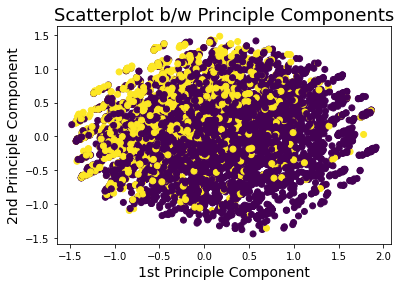

In [67]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('1st Principle Component',fontsize=14)
plt.ylabel('2nd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

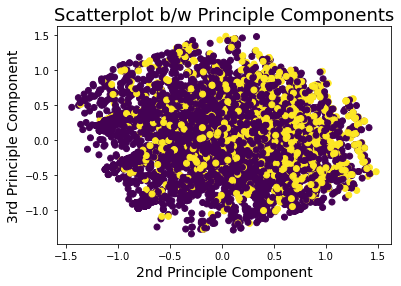

In [68]:
plt.scatter(x[:,1],x[:,2],c=y)
plt.xlabel('2nd Principle Component',fontsize=14)
plt.ylabel('3rd Principle Component',fontsize=14)
plt.title('Scatterplot b/w Principle Components',fontsize=18)
plt.show()

# Using IMBlearn Balancing Techniques

In [69]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [71]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [72]:
print(x.shape)
print(y.shape)

(10348, 3)
(10348,)


# Training_Testing Phase

In [73]:
#importing machine learning libraries for Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
lr=LogisticRegression()

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(f'At random_state-{6} The Training and Testing Accuracy of the model is almost same')
print(f'Training accuracy of the model is\t {accuracy_score(pred_train,y_train)}')
print(f'Testing accuracy of the model is\t {accuracy_score(pred_test,y_test)}')
print(f'Confusion Matrix for the model is\n {confusion_matrix(pred_test,y_test)}')
print(f'Classification Report for the model is\n {classification_report(pred_test,y_test)}')

At random_state-6 The Training and Testing Accuracy of the model is almost same
Training accuracy of the model is	 0.7283160183619232
Testing accuracy of the model is	 0.7391304347826086
Confusion Matrix for the model is
 [[746 229]
 [311 784]]
Classification Report for the model is
               precision    recall  f1-score   support

           0       0.71      0.77      0.73       975
           1       0.77      0.72      0.74      1095

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



# CV Score

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
for i in range(2,7):
    cvs=cross_val_score(lr,x,y,cv=i)
    mean=cvs.mean()
    std=cvs.std()
    print(f'At K-Fold {i} the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 2 the CV Score of the logistic model is 0.7294163123308852 and standard deviation is 0.0005798221878623999

At K-Fold 3 the CV Score of the logistic model is 0.7311562967912004 and standard deviation is 0.0038189867583934625

At K-Fold 4 the CV Score of the logistic model is 0.7298994974874371 and standard deviation is 0.0021238172570386513

At K-Fold 5 the CV Score of the logistic model is 0.7307696546442422 and standard deviation is 0.007796262429533197

At K-Fold 6 the CV Score of the logistic model is 0.7298034006971764 and standard deviation is 0.009125554846207723



In [77]:
cvs=cross_val_score(lr,x,y,cv=3)
mean=cvs.mean()
std=cvs.std()
print(f'At K-Fold 3 the CV Score of the logistic model is {mean} and standard deviation is {std}\n')

At K-Fold 3 the CV Score of the logistic model is 0.7311562967912004 and standard deviation is 0.0038189867583934625



In [78]:
#importing other models of classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score
gb=GaussianNB()
neighbor=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()

In [79]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print(f'For model {algorithm}')
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    print('\n Classification Report-\n',classification_report(y_test,pred_test_y))
    print('\n Confusion Metrix-\n',confusion_matrix(y_test,pred_test_y))
    print('\n\nAUC_ROC CURVE')
    prob=algorithm.predict_proba(x_test)[:,1]
    FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
    plt.plot(FPR,TPR)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC_Curve for the model {algorithm}')
    plt.show()
    ROC_AUC_SCORE=roc_auc_score(y_test,pred_test_y)
    print('ROC AUC SCORE is-',ROC_AUC_SCORE)
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for l in range(2,4):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

For model LogisticRegression()
Training_Accuracy_Score= 0.7313360715148587
Testing_Accuracy_Score= 0.7285024154589372

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1043
           1       0.72      0.75      0.73      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[735 308]
 [254 773]]


AUC_ROC CURVE


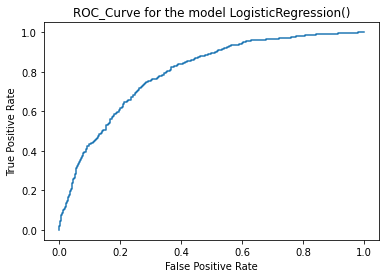

ROC AUC SCORE is- 0.7286878443109859


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7294163123308852


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7311562967912004




In [80]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7304904566320367
Testing_Accuracy_Score= 0.7265700483091787

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1043
           1       0.70      0.78      0.74      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[708 335]
 [231 796]]


AUC_ROC CURVE


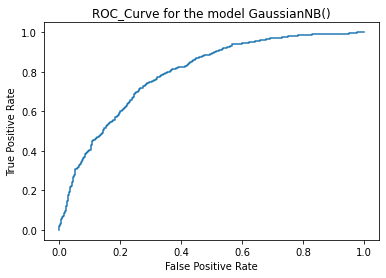

ROC AUC SCORE is- 0.7269420750008635


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7277734827986084


At the K-Fold 3 the CV score of model GaussianNB() is 0.7283540002493196




In [81]:
model(gb,x,y)

For model KNeighborsClassifier()
Training_Accuracy_Score= 0.8400579850205364
Testing_Accuracy_Score= 0.7758454106280194

 Classification Report-
               precision    recall  f1-score   support

           0       0.83      0.70      0.76      1043
           1       0.74      0.86      0.79      1027

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.77      2070
weighted avg       0.78      0.78      0.77      2070


 Confusion Metrix-
 [[726 317]
 [147 880]]


AUC_ROC CURVE


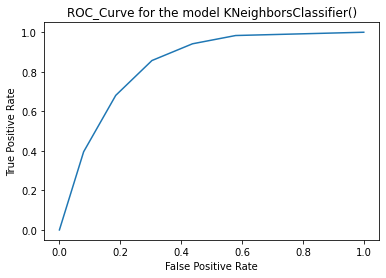

ROC AUC SCORE is- 0.7764668429862551


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.7731928875144956


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.7792819314707197




In [82]:
model(neighbor,x,y)

For model DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7289855072463768

 Classification Report-
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1043
           1       0.72      0.73      0.73      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[756 287]
 [274 753]]


AUC_ROC CURVE


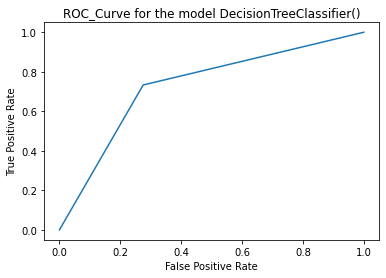

ROC AUC SCORE is- 0.7290178600602526


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.7363741785852338


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.750774781740279




In [83]:
model(dtc,x,y)

For model RandomForestClassifier()
Training_Accuracy_Score= 0.9998791978738826
Testing_Accuracy_Score= 0.7714975845410628

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1043
           1       0.75      0.80      0.78      1027

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070


 Confusion Metrix-
 [[772 271]
 [202 825]]


AUC_ROC CURVE


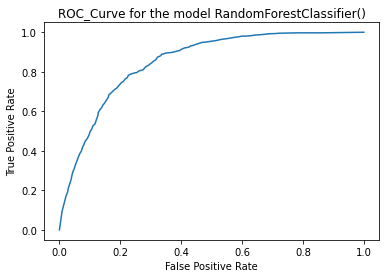

ROC AUC SCORE is- 0.7717415962679747


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.7815036722071897


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.7893330980204302




In [84]:
model(rfc,x,y)

For model AdaBoostClassifier()
Training_Accuracy_Score= 0.7382217927035516
Testing_Accuracy_Score= 0.7323671497584541

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1043
           1       0.72      0.74      0.73      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[752 291]
 [263 764]]


AUC_ROC CURVE


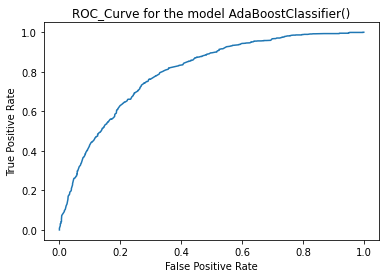

ROC AUC SCORE is- 0.7324557186081271


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.7280633938925396


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.7319291596107812




In [85]:
model(ad,x,y)

For model GradientBoostingClassifier()
Training_Accuracy_Score= 0.7547716839816381
Testing_Accuracy_Score= 0.7328502415458937

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.70      0.72      1043
           1       0.71      0.77      0.74      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[727 316]
 [237 790]]


AUC_ROC CURVE


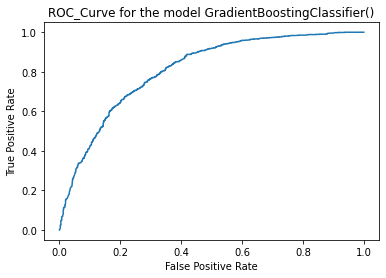

ROC AUC SCORE is- 0.7331292868205619


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.7372439118670274


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.736374472471892




In [86]:
model(grd,x,y)

# Hyper Parameter Tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [120]:
#defining all the parameters of the respective models
Parameter_neighbor={'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Parameter_dtc={'criterion':["gini", "entropy"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
Parameter_rfc={'criterion' : ["gini", "entropy"],'max_features':["sqrt", "log2", None],'class_weight':["balanced", "balanced_subsample"]}
Parameter_ad={'algorithm':['SAMME', 'SAMME.R']}
Parameter_grd={'loss':[ 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}

In [89]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [90]:
HPT(neighbor,Parameter_neighbor)

The best Parameters of the model KNeighborsClassifier() is {'algorithm': 'auto', 'weights': 'distance'}


In [91]:
HPT(dtc,Parameter_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


In [92]:
HPT(rfc,Parameter_rfc)

The best Parameters of the model RandomForestClassifier() is {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}


In [93]:
HPT(ad,Parameter_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME'}


In [94]:
HPT(grd,Parameter_grd)

The best Parameters of the model GradientBoostingClassifier() is {'criterion': 'squared_error', 'loss': 'deviance', 'max_features': 'sqrt'}


In [111]:
#Redefining the models after getting the parameters
lr=LogisticRegression()
gb=GaussianNB()
neighbor=KNeighborsClassifier(algorithm='auto',weights='distance')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='log2',splitter='best')
rfc=RandomForestClassifier(class_weight= 'balanced_subsample',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(criterion='squared_error',loss= 'deviance',max_features= 'log2')

For model LogisticRegression()
Training_Accuracy_Score= 0.7313360715148587
Testing_Accuracy_Score= 0.7285024154589372

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1043
           1       0.72      0.75      0.73      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[735 308]
 [254 773]]


AUC_ROC CURVE


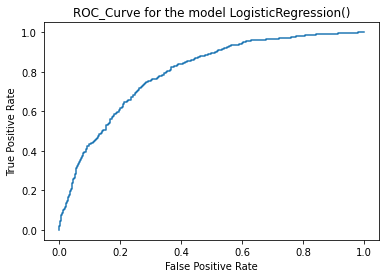

ROC AUC SCORE is- 0.7286878443109859


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model LogisticRegression() is 0.7294163123308852


At the K-Fold 3 the CV score of model LogisticRegression() is 0.7311562967912004




In [96]:
model(lr,x,y)

For model GaussianNB()
Training_Accuracy_Score= 0.7304904566320367
Testing_Accuracy_Score= 0.7265700483091787

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1043
           1       0.70      0.78      0.74      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[708 335]
 [231 796]]


AUC_ROC CURVE


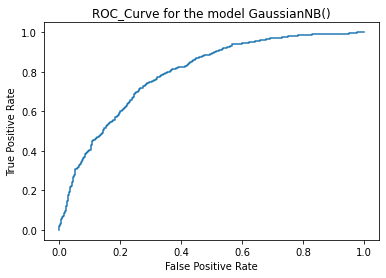

ROC AUC SCORE is- 0.7269420750008635


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GaussianNB() is 0.7277734827986084


At the K-Fold 3 the CV score of model GaussianNB() is 0.7283540002493196




In [97]:
model(gb,x,y)

For model KNeighborsClassifier(weights='distance')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7845410628019324

 Classification Report-
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1043
           1       0.74      0.86      0.80      1027

    accuracy                           0.78      2070
   macro avg       0.79      0.79      0.78      2070
weighted avg       0.79      0.78      0.78      2070


 Confusion Metrix-
 [[739 304]
 [142 885]]


AUC_ROC CURVE


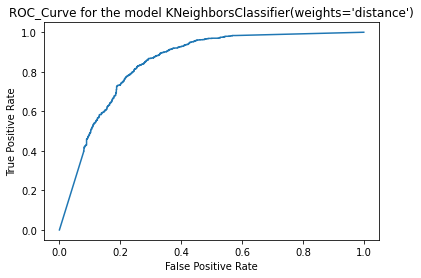

ROC AUC SCORE is- 0.7851331405829749


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model KNeighborsClassifier(weights='distance') is 0.7892346347120216


At the K-Fold 3 the CV score of model KNeighborsClassifier(weights='distance') is 0.7914595983152717




In [98]:
model(neighbor,x,y)

For model DecisionTreeClassifier(criterion='entropy', max_features='log2')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.7231884057971014

 Classification Report-
               precision    recall  f1-score   support

           0       0.73      0.72      0.72      1043
           1       0.72      0.73      0.72      1027

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070


 Confusion Metrix-
 [[746 297]
 [276 751]]


AUC_ROC CURVE


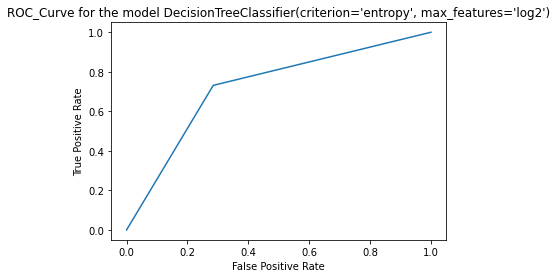

ROC AUC SCORE is- 0.7232502863715164


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.7258407421724005


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.7380178249524122




In [99]:
model(dtc,x,y)

For model RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt')
Training_Accuracy_Score= 0.9998791978738826
Testing_Accuracy_Score= 0.7710144927536232

 Classification Report-
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1043
           1       0.75      0.80      0.78      1027

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070


 Confusion Metrix-
 [[770 273]
 [201 826]]


AUC_ROC CURVE


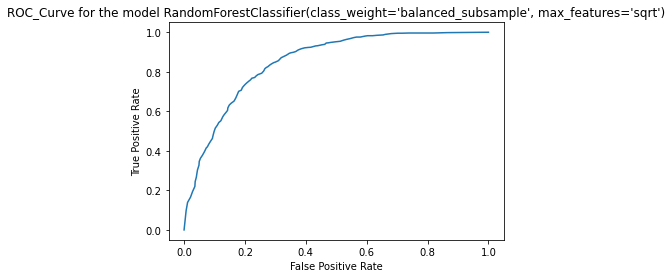

ROC AUC SCORE is- 0.771269678414356


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt') is 0.7816003092385002


At the K-Fold 3 the CV score of model RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt') is 0.7907828496112436




In [112]:
model(rfc,x,y)

For model AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.739792220343078
Testing_Accuracy_Score= 0.7314009661835749

 Classification Report-
               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1043
           1       0.72      0.75      0.74      1027

    accuracy                           0.73      2070
   macro avg       0.73      0.73      0.73      2070
weighted avg       0.73      0.73      0.73      2070


 Confusion Metrix-
 [[740 303]
 [253 774]]


AUC_ROC CURVE


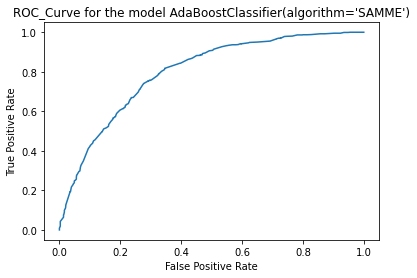

ROC AUC SCORE is- 0.731571631155354


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7315423270197139


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.7332819846962573




In [102]:
model(ad,x,y)

For model GradientBoostingClassifier(criterion='squared_error', max_features='log2')
Training_Accuracy_Score= 0.7487315776757671
Testing_Accuracy_Score= 0.7231884057971014

 Classification Report-
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      1043
           1       0.71      0.74      0.73      1027

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070


 Confusion Metrix-
 [[734 309]
 [264 763]]


AUC_ROC CURVE


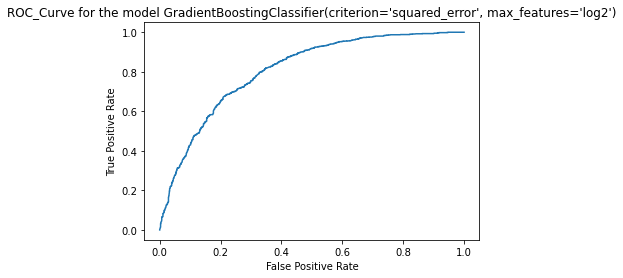

ROC AUC SCORE is- 0.7233399087532126


Finding out the best K-Fold Value

	
At the K-Fold 2 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='log2') is 0.7345380749903363


At the K-Fold 3 the CV score of model GradientBoostingClassifier(criterion='squared_error', max_features='log2') is 0.7308665257590592




In [103]:
model(grd,x,y)

 RandomForestClassification model seems perfect as compare to other models as the training accuracy is almost 100% while testing accuracy and CV score is 79% which is good enough.Also the CV score and testing accuracy are same it's also indicates that our model is performing excellent by each method either random_state or K-Fold method.The F1-score is 79 % too it means that error are on lower side and ROC_AUC_SCORE is 0.79,which is greater than the threshold value of 0.6, which indicates that the machine probability is good while predicting 1 as 1 and 0 as 0.

# Saving the Best Model

In [104]:
import joblib

In [123]:
file='churn.obj'
joblib.dump(rfc,file)

['churn.obj']

# Loading the Model

In [124]:
a=joblib.load('churn.obj')
a

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt')

In [125]:

pred=a.predict(x_test)
pred

array([0, 0, 1, ..., 0, 1, 0])

In [126]:
accuracy=accuracy_score(pred,y_test)
accuracy

0.9570048309178744


The ROC AUC Score is= 0.9571394949852485


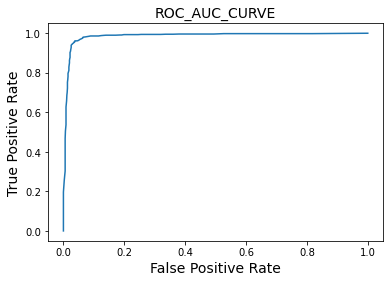

In [127]:
prob=a.predict_proba(x_test)[:,1]
FPR,TPR,THRESHOLD=roc_curve(y_test,prob)
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC_AUC_CURVE',fontsize=14)
print(f'\nThe ROC AUC Score is= {roc_auc_score(y_test,pred)}')

In [128]:
conclusion=pd.DataFrame(data=[pred,y_test],index=['Predicted Churn','Original Churn'])
conclusion

0     1     2     3     4     5     6     7     8     9     \
Predicted Churn     0     0     1     0     1     0     0     0     0     1   
Original Churn      0     0     1     0     1     0     0     0     0     1   

                 ...  2060  2061  2062  2063  2064  2065  2066  2067  2068  \
Predicted Churn  ...     0     0     1     1     0     1     0     0     1   
Original Churn   ...     0     0     0     1     0     1     0     0     1   

                 2069  
Predicted Churn     0  
Original Churn      0  

[2 rows x 2070 columns]